In [1]:
!pip install --upgrade pyTsetlinMachine

  Created wheel for pyTsetlinMachine: filename=pyTsetlinMachine-0.4.8-cp36-cp36m-linux_x86_64.whl size=41749 sha256=f4f521aeb78e3f0ac0b336966b22321eba1cd3678f3d323bc483216a2abf1291
  Stored in directory: /root/.cache/pip/wheels/c6/1f/fa/684c28a2c412d424581c36d298cea45fe5c1f8d725a8a5c075
Successfully built pyTsetlinMachine


In [2]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


import pyTsetlinMachine
from pyTsetlinMachine.tm import MultiClassTsetlinMachine
from pyTsetlinMachine.tm import RegressionTsetlinMachine
from pyTsetlinMachine.tools import Binarizer

In [3]:
from google.colab import  files
file = files.upload()

Saving deshar.txt to deshar.txt


In [4]:
number_of_folds = 77
def k10Fold(nfolds,data):
    isOdd = False
    efsize = len(data)//nfolds
    if len(data)-efsize*nfolds:
        isOdd = True
    folds = []
    foldscounter = 0
    counter = 0
    curfold = []
    i = 0
    for item in data:
        if foldscounter < nfolds+1:   #rows / folds
            if counter < efsize :
                curfold.append(i)
                counter += 1
            else:
                foldscounter+=1
                if foldscounter != nfolds:
                    folds.append(curfold)
                    
                    curfold = []
                    curfold.append(i)
                    counter = 1
            i+=1
        else:
            curfold.append(i)
            i+=1
    folds.append(curfold)
    print(folds)
    return folds
def trainTestSpliter(testFolIndex,data):
    test_data = []
    train_data = []
    for i in range(len(data)):
        if i not in testFolIndex:
            train_data.append(data[i])
        else:
            test_data.append(data[i])
    return np.array(train_data), np.array(test_data)
def dataTargetSpluter(train_d,test_d):
    train_x = []
    train_y = []
    test_x = []
    test_y = []
    for i in train_d:
        train_x.append(i[:9])
        train_y.append(i[9])
    for i in test_d:
        test_x.append(i[:9])
        test_y.append(i[9])
    return np.array(train_x), np.array(train_y), np.array(test_x), np.array(test_y)

In [5]:
x = np.loadtxt("deshar.txt")
df = pd.DataFrame(x,columns = ["F1","F2","F3","F4","F5","F6","F7","F8","F9","Effort"])
"""scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)"""
scaled_data = np.array(df)
foldsIndex = k10Fold(number_of_folds,scaled_data)

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76]]


 
Fold  # 1


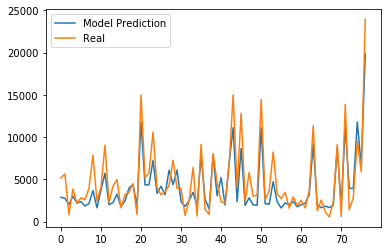

Prediction :  2858.664       real : 5152.0
Prediction :  2751.72       real : 5635.0
Prediction :  1989.744       real : 805.0
Prediction :  3005.712       real : 3829.0
Prediction :  2190.264       real : 2149.0
Prediction :  2350.6800000000003       real : 2821.0
Prediction :  1829.328       real : 2569.0
Prediction :  2123.424       real : 3913.0
Prediction :  3660.744       real : 7854.0
Prediction :  1628.808       real : 2422.0
Prediction :  3727.584       real : 4067.0
Prediction :  5706.048       real : 9051.0
Prediction :  1989.744       real : 2282.0
Prediction :  2243.736       real : 4172.0
Prediction :  3232.968       real : 4977.0
Prediction :  1762.488       real : 1617.0
Prediction :  2430.888       real : 3192.0
Prediction :  3968.208       real : 3437.0
Prediction :  4382.616       real : 4494.0
Prediction :  1842.696       real : 840.0
Prediction :  11801.856       real : 14973.0
Prediction :  4329.144       real : 5180.0
Prediction :  4369.248       real : 5775.0
Pr

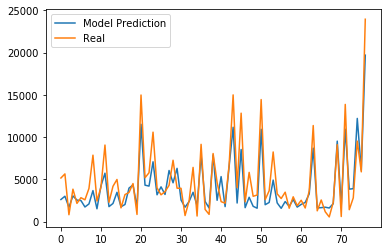

Prediction :  2604.672       real : 5152.0
Prediction :  2992.344       real : 5635.0
Prediction :  1682.28       real : 805.0
Prediction :  3032.448       real : 3829.0
Prediction :  2537.8320000000003       real : 2149.0
Prediction :  2484.3599999999997       real : 2821.0
Prediction :  1722.384       real : 2569.0
Prediction :  2083.3199999999997       real : 3913.0
Prediction :  3660.744       real : 7854.0
Prediction :  1508.496       real : 2422.0
Prediction :  4222.2       real : 4067.0
Prediction :  5719.416       real : 9051.0
Prediction :  1762.488       real : 2282.0
Prediction :  2136.792       real : 4172.0
Prediction :  3460.224       real : 4977.0
Prediction :  1749.12       real : 1617.0
Prediction :  2016.48       real : 3192.0
Prediction :  3954.84       real : 3437.0
Prediction :  4329.144       real : 4494.0
Prediction :  1709.016       real : 840.0
Prediction :  11507.76       real : 14973.0
Prediction :  4302.407999999999       real : 5180.0
Prediction :  4195.464

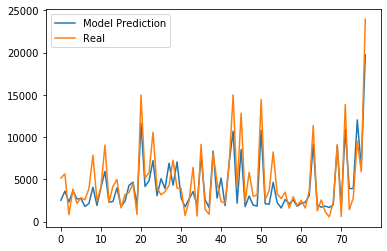

Prediction :  2524.464       real : 5152.0
Prediction :  3593.904       real : 5635.0
Prediction :  2310.576       real : 805.0
Prediction :  3593.904       real : 3829.0
Prediction :  2671.512       real : 2149.0
Prediction :  2724.984       real : 2821.0
Prediction :  1789.224       real : 2569.0
Prediction :  2136.792       real : 3913.0
Prediction :  4061.784       real : 7854.0
Prediction :  1909.536       real : 2422.0
Prediction :  4035.048       real : 4067.0
Prediction :  5933.304       real : 9051.0
Prediction :  2283.84       real : 2282.0
Prediction :  2377.416       real : 4172.0
Prediction :  3994.944       real : 4977.0
Prediction :  1775.856       real : 1617.0
Prediction :  2404.152       real : 3192.0
Prediction :  4275.6720000000005       real : 3437.0
Prediction :  4663.344       real : 4494.0
Prediction :  1922.904       real : 840.0
Prediction :  11628.072       real : 14973.0
Prediction :  4155.360000000001       real : 5180.0
Prediction :  4823.76       real : 5

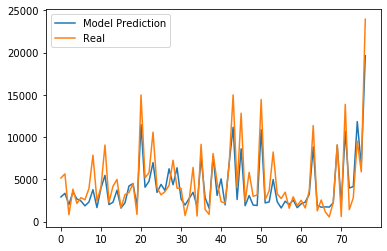

Prediction :  2912.136       real : 5152.0
Prediction :  3339.912       real : 5635.0
Prediction :  2003.112       real : 805.0
Prediction :  3486.96       real : 3829.0
Prediction :  2671.512       real : 2149.0
Prediction :  2430.888       real : 2821.0
Prediction :  1856.064       real : 2569.0
Prediction :  2310.576       real : 3913.0
Prediction :  3767.688       real : 7854.0
Prediction :  1655.544       real : 2422.0
Prediction :  3954.84       real : 4067.0
Prediction :  5465.424       real : 9051.0
Prediction :  2003.112       real : 2282.0
Prediction :  2283.84       real : 4172.0
Prediction :  3714.216       real : 4977.0
Prediction :  1602.072       real : 1617.0
Prediction :  2217.0       real : 3192.0
Prediction :  4208.832       real : 3437.0
Prediction :  4489.5599999999995       real : 4494.0
Prediction :  1815.96       real : 840.0
Prediction :  11481.024       real : 14973.0
Prediction :  4061.784       real : 5180.0
Prediction :  4770.288       real : 5775.0
Predict

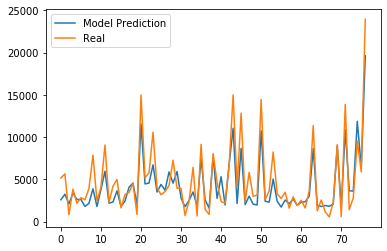

Prediction :  2577.9359999999997       real : 5152.0
Prediction :  3232.968       real : 5635.0
Prediction :  2083.3199999999997       real : 805.0
Prediction :  3366.648       real : 3829.0
Prediction :  2604.672       real : 2149.0
Prediction :  2618.04       real : 2821.0
Prediction :  1789.224       real : 2569.0
Prediction :  2150.16       real : 3913.0
Prediction :  3874.632       real : 7854.0
Prediction :  1775.856       real : 2422.0
Prediction :  3794.424       real : 4067.0
Prediction :  5946.672       real : 9051.0
Prediction :  2176.8959999999997       real : 2282.0
Prediction :  2310.576       real : 4172.0
Prediction :  3634.008       real : 4977.0
Prediction :  1789.224       real : 1617.0
Prediction :  2417.52       real : 3192.0
Prediction :  4048.416       real : 3437.0
Prediction :  4556.4       real : 4494.0
Prediction :  1936.272       real : 840.0
Prediction :  11547.864       real : 14973.0
Prediction :  4449.456       real : 5180.0
Prediction :  4556.4       re

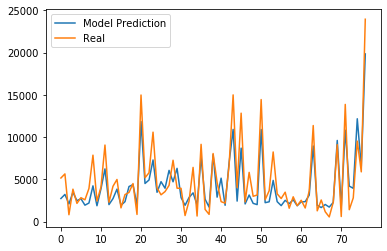

Prediction :  2724.984       real : 5152.0
Prediction :  3206.232       real : 5635.0
Prediction :  2083.3199999999997       real : 805.0
Prediction :  3460.224       real : 3829.0
Prediction :  2470.992       real : 2149.0
Prediction :  2698.248       real : 2821.0
Prediction :  1936.272       real : 2569.0
Prediction :  2190.264       real : 3913.0
Prediction :  4222.2       real : 7854.0
Prediction :  1869.432       real : 2422.0
Prediction :  3874.632       real : 4067.0
Prediction :  6227.4       real : 9051.0
Prediction :  2003.112       real : 2282.0
Prediction :  2711.616       real : 4172.0
Prediction :  3834.528       real : 4977.0
Prediction :  1922.904       real : 1617.0
Prediction :  2350.6800000000003       real : 3192.0
Prediction :  4141.992       real : 3437.0
Prediction :  4369.248       real : 4494.0
Prediction :  1909.536       real : 840.0
Prediction :  11828.592       real : 14973.0
Prediction :  4502.928       real : 5180.0
Prediction :  4917.336       real : 57

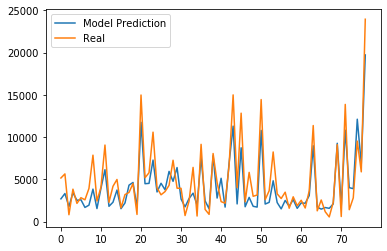

Prediction :  2684.88       real : 5152.0
Prediction :  3313.176       real : 5635.0
Prediction :  1762.488       real : 805.0
Prediction :  3406.752       real : 3829.0
Prediction :  2511.096       real : 2149.0
Prediction :  2577.9359999999997       real : 2821.0
Prediction :  1668.912       real : 2569.0
Prediction :  1936.272       real : 3913.0
Prediction :  3834.528       real : 7854.0
Prediction :  1535.232       real : 2422.0
Prediction :  3941.472       real : 4067.0
Prediction :  6133.824       real : 9051.0
Prediction :  1802.592       real : 2282.0
Prediction :  2283.84       real : 4172.0
Prediction :  3727.584       real : 4977.0
Prediction :  1521.864       real : 1617.0
Prediction :  2203.632       real : 3192.0
Prediction :  4302.407999999999       real : 3437.0
Prediction :  4623.24       real : 4494.0
Prediction :  1655.544       real : 840.0
Prediction :  11748.384       real : 14973.0
Prediction :  4476.192       real : 5180.0
Prediction :  4516.296       real : 57

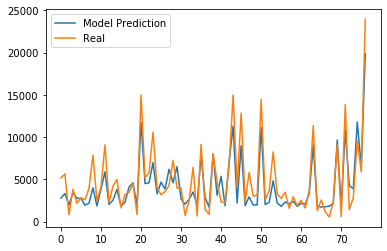

Prediction :  2765.088       real : 5152.0
Prediction :  3313.176       real : 5635.0
Prediction :  1936.272       real : 805.0
Prediction :  3420.12       real : 3829.0
Prediction :  2738.352       real : 2149.0
Prediction :  2751.72       real : 2821.0
Prediction :  1936.272       real : 2569.0
Prediction :  2150.16       real : 3913.0
Prediction :  3994.944       real : 7854.0
Prediction :  1842.696       real : 2422.0
Prediction :  3821.16       real : 4067.0
Prediction :  5879.832       real : 9051.0
Prediction :  2043.216       real : 2282.0
Prediction :  2511.096       real : 4172.0
Prediction :  3807.792       real : 4977.0
Prediction :  1815.96       real : 1617.0
Prediction :  2283.84       real : 3192.0
Prediction :  4061.784       real : 3437.0
Prediction :  4583.136       real : 4494.0
Prediction :  1869.432       real : 840.0
Prediction :  11775.12       real : 14973.0
Prediction :  4489.5599999999995       real : 5180.0
Prediction :  4583.136       real : 5775.0
Predicti

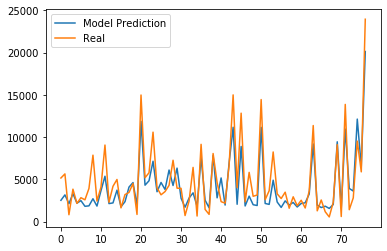

Prediction :  2511.096       real : 5152.0
Prediction :  3152.76       real : 5635.0
Prediction :  2110.056       real : 805.0
Prediction :  3299.808       real : 3829.0
Prediction :  2176.8959999999997       real : 2149.0
Prediction :  2470.992       real : 2821.0
Prediction :  1802.592       real : 2569.0
Prediction :  1856.064       real : 3913.0
Prediction :  2698.248       real : 7854.0
Prediction :  1829.328       real : 2422.0
Prediction :  3647.376       real : 4067.0
Prediction :  5358.48       real : 9051.0
Prediction :  2123.424       real : 2282.0
Prediction :  2203.632       real : 4172.0
Prediction :  3714.216       real : 4977.0
Prediction :  1749.12       real : 1617.0
Prediction :  2350.6800000000003       real : 3192.0
Prediction :  4075.152       real : 3437.0
Prediction :  4609.871999999999       real : 4494.0
Prediction :  1896.168       real : 840.0
Prediction :  11855.328       real : 14973.0
Prediction :  4302.407999999999       real : 5180.0
Prediction :  4823.

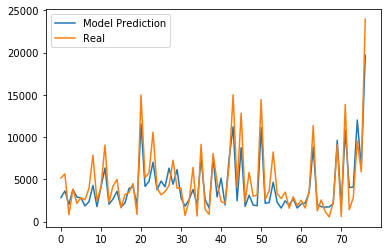

Prediction :  2831.928       real : 5152.0
Prediction :  3620.64       real : 5635.0
Prediction :  2016.48       real : 805.0
Prediction :  3794.424       real : 3829.0
Prediction :  2885.4       real : 2149.0
Prediction :  2805.192       real : 2821.0
Prediction :  1842.696       real : 2569.0
Prediction :  2337.312       real : 3913.0
Prediction :  4275.6720000000005       real : 7854.0
Prediction :  1762.488       real : 2422.0
Prediction :  4061.784       real : 4067.0
Prediction :  6334.344       real : 9051.0
Prediction :  2056.584       real : 2282.0
Prediction :  2658.144       real : 4172.0
Prediction :  3580.536       real : 4977.0
Prediction :  1695.648       real : 1617.0
Prediction :  2203.632       real : 3192.0
Prediction :  3914.736       real : 3437.0
Prediction :  4155.360000000001       real : 4494.0
Prediction :  1922.904       real : 840.0
Prediction :  11547.864       real : 14973.0
Prediction :  4155.360000000001       real : 5180.0
Prediction :  4756.92       re

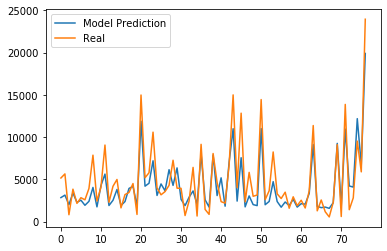

Prediction :  2831.928       real : 5152.0
Prediction :  3126.024       real : 5635.0
Prediction :  1989.744       real : 805.0
Prediction :  3380.016       real : 3829.0
Prediction :  2270.4719999999998       real : 2149.0
Prediction :  2524.464       real : 2821.0
Prediction :  1922.904       real : 2569.0
Prediction :  2390.784       real : 3913.0
Prediction :  4035.048       real : 7854.0
Prediction :  1735.752       real : 2422.0
Prediction :  4262.304       real : 4067.0
Prediction :  5612.472       real : 9051.0
Prediction :  1896.168       real : 2282.0
Prediction :  2511.096       real : 4172.0
Prediction :  3794.424       real : 4977.0
Prediction :  1896.168       real : 1617.0
Prediction :  2364.048       real : 3192.0
Prediction :  3914.736       real : 3437.0
Prediction :  4168.728       real : 4494.0
Prediction :  1815.96       real : 840.0
Prediction :  11868.696       real : 14973.0
Prediction :  4182.096       real : 5180.0
Prediction :  4529.664000000001       real : 

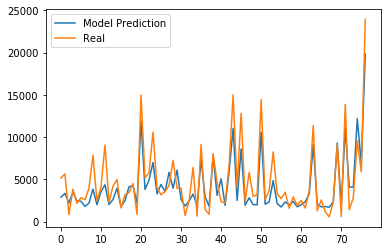

Prediction :  2872.032       real : 5152.0
Prediction :  3339.912       real : 5635.0
Prediction :  2203.632       real : 805.0
Prediction :  3473.592       real : 3829.0
Prediction :  2444.2560000000003       real : 2149.0
Prediction :  2404.152       real : 2821.0
Prediction :  1789.224       real : 2569.0
Prediction :  2176.8959999999997       real : 3913.0
Prediction :  3834.528       real : 7854.0
Prediction :  1989.744       real : 2422.0
Prediction :  3513.696       real : 4067.0
Prediction :  4355.88       real : 9051.0
Prediction :  2016.48       real : 2282.0
Prediction :  2591.304       real : 4172.0
Prediction :  3941.472       real : 4977.0
Prediction :  1775.856       real : 1617.0
Prediction :  2470.992       real : 3192.0
Prediction :  4115.255999999999       real : 3437.0
Prediction :  4235.568       real : 4494.0
Prediction :  2203.632       real : 840.0
Prediction :  11868.696       real : 14973.0
Prediction :  3794.424       real : 5180.0
Prediction :  4917.336     

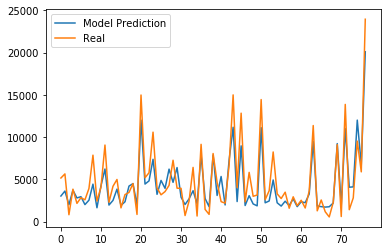

Prediction :  3019.08       real : 5152.0
Prediction :  3607.272       real : 5635.0
Prediction :  1989.744       real : 805.0
Prediction :  3700.848       real : 3829.0
Prediction :  2791.824       real : 2149.0
Prediction :  2938.872       real : 2821.0
Prediction :  2003.112       real : 2569.0
Prediction :  2524.464       real : 3913.0
Prediction :  4422.719999999999       real : 7854.0
Prediction :  1628.808       real : 2422.0
Prediction :  4222.2       real : 4067.0
Prediction :  6214.032       real : 9051.0
Prediction :  1949.64       real : 2282.0
Prediction :  2497.728       real : 4172.0
Prediction :  3834.528       real : 4977.0
Prediction :  1909.536       real : 1617.0
Prediction :  2337.312       real : 3192.0
Prediction :  4195.464       real : 3437.0
Prediction :  4489.5599999999995       real : 4494.0
Prediction :  1922.904       real : 840.0
Prediction :  12002.376       real : 14973.0
Prediction :  4436.088       real : 5180.0
Prediction :  4810.392       real : 577

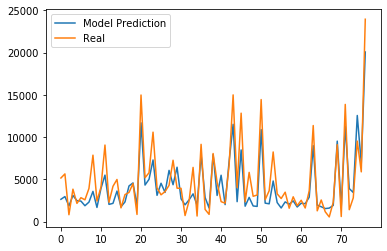

Prediction :  2631.408       real : 5152.0
Prediction :  2952.24       real : 5635.0
Prediction :  1842.696       real : 805.0
Prediction :  3085.92       real : 3829.0
Prediction :  2470.992       real : 2149.0
Prediction :  2417.52       real : 2821.0
Prediction :  1869.432       real : 2569.0
Prediction :  2297.208       real : 3913.0
Prediction :  3567.168       real : 7854.0
Prediction :  1668.912       real : 2422.0
Prediction :  3914.736       real : 4067.0
Prediction :  5492.16       real : 9051.0
Prediction :  2029.848       real : 2282.0
Prediction :  2150.16       real : 4172.0
Prediction :  3607.272       real : 4977.0
Prediction :  1749.12       real : 1617.0
Prediction :  2323.944       real : 3192.0
Prediction :  4208.832       real : 3437.0
Prediction :  4569.768       real : 4494.0
Prediction :  1856.064       real : 840.0
Prediction :  11681.544       real : 14973.0
Prediction :  4315.776       real : 5180.0
Prediction :  4997.544       real : 5775.0
Prediction :  728

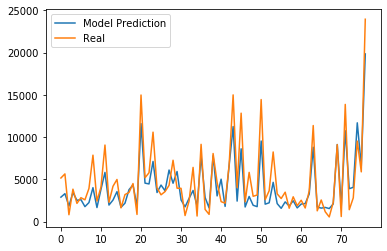

Prediction :  2885.4       real : 5152.0
Prediction :  3299.808       real : 5635.0
Prediction :  1829.328       real : 805.0
Prediction :  3433.488       real : 3829.0
Prediction :  2511.096       real : 2149.0
Prediction :  2591.304       real : 2821.0
Prediction :  1762.488       real : 2569.0
Prediction :  2243.736       real : 3913.0
Prediction :  4008.312       real : 7854.0
Prediction :  1655.544       real : 2422.0
Prediction :  3807.792       real : 4067.0
Prediction :  5812.992       real : 9051.0
Prediction :  1949.64       real : 2282.0
Prediction :  2537.8320000000003       real : 4172.0
Prediction :  3540.432       real : 4977.0
Prediction :  1682.28       real : 1617.0
Prediction :  2176.8959999999997       real : 3192.0
Prediction :  3767.688       real : 3437.0
Prediction :  4329.144       real : 4494.0
Prediction :  1789.224       real : 840.0
Prediction :  11587.968       real : 14973.0
Prediction :  4543.032       real : 5180.0
Prediction :  4449.456       real : 57

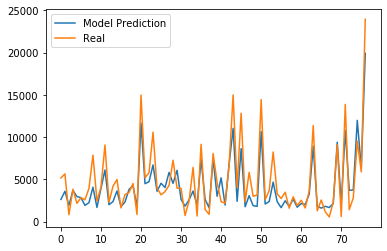

Prediction :  2618.04       real : 5152.0
Prediction :  3580.536       real : 5635.0
Prediction :  1909.536       real : 805.0
Prediction :  3674.112       real : 3829.0
Prediction :  2952.24       real : 2149.0
Prediction :  2831.928       real : 2821.0
Prediction :  1909.536       real : 2569.0
Prediction :  2230.368       real : 3913.0
Prediction :  4061.784       real : 7854.0
Prediction :  1668.912       real : 2422.0
Prediction :  3914.736       real : 4067.0
Prediction :  6093.72       real : 9051.0
Prediction :  1989.744       real : 2282.0
Prediction :  2364.048       real : 4172.0
Prediction :  3620.64       real : 4977.0
Prediction :  1762.488       real : 1617.0
Prediction :  2310.576       real : 3192.0
Prediction :  3794.424       real : 3437.0
Prediction :  4248.936       real : 4494.0
Prediction :  1695.648       real : 840.0
Prediction :  11668.176       real : 14973.0
Prediction :  4476.192       real : 5180.0
Prediction :  4716.816       real : 5775.0
Prediction :  6

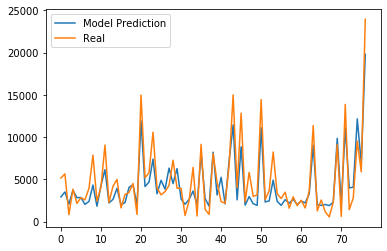

Prediction :  2912.136       real : 5152.0
Prediction :  3500.328       real : 5635.0
Prediction :  2056.584       real : 805.0
Prediction :  3700.848       real : 3829.0
Prediction :  2818.56       real : 2149.0
Prediction :  2845.296       real : 2821.0
Prediction :  2029.848       real : 2569.0
Prediction :  2377.416       real : 3913.0
Prediction :  4315.776       real : 7854.0
Prediction :  1815.96       real : 2422.0
Prediction :  4262.304       real : 4067.0
Prediction :  6133.824       real : 9051.0
Prediction :  2203.632       real : 2282.0
Prediction :  2618.04       real : 4172.0
Prediction :  3928.104       real : 4977.0
Prediction :  1989.744       real : 1617.0
Prediction :  2243.736       real : 3192.0
Prediction :  4035.048       real : 3437.0
Prediction :  4355.88       real : 4494.0
Prediction :  1936.272       real : 840.0
Prediction :  11922.168       real : 14973.0
Prediction :  4141.992       real : 5180.0
Prediction :  4676.712       real : 5775.0
Prediction :  7

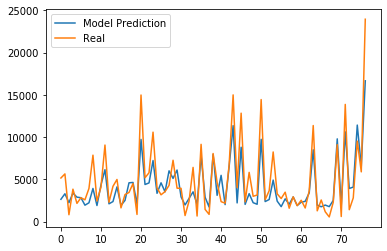

Prediction :  2631.408       real : 5152.0
Prediction :  3286.44       real : 5635.0
Prediction :  2230.368       real : 805.0
Prediction :  3366.648       real : 3829.0
Prediction :  2885.4       real : 2149.0
Prediction :  2818.56       real : 2821.0
Prediction :  1936.272       real : 2569.0
Prediction :  2217.0       real : 3913.0
Prediction :  3914.736       real : 7854.0
Prediction :  1896.168       real : 2422.0
Prediction :  4329.144       real : 4067.0
Prediction :  6133.824       real : 9051.0
Prediction :  2096.688       real : 2282.0
Prediction :  2364.048       real : 4172.0
Prediction :  4101.888       real : 4977.0
Prediction :  1909.536       real : 1617.0
Prediction :  2497.728       real : 3192.0
Prediction :  4583.136       real : 3437.0
Prediction :  4623.24       real : 4494.0
Prediction :  2029.848       real : 840.0
Prediction :  9716.448       real : 14973.0
Prediction :  4382.616       real : 5180.0
Prediction :  4569.768       real : 5775.0
Prediction :  7216.

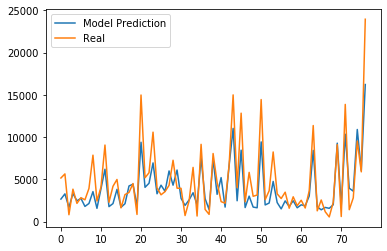

Prediction :  2658.144       real : 5152.0
Prediction :  3273.072       real : 5635.0
Prediction :  1668.912       real : 805.0
Prediction :  3313.176       real : 3829.0
Prediction :  2457.624       real : 2149.0
Prediction :  2738.352       real : 2821.0
Prediction :  1789.224       real : 2569.0
Prediction :  2136.792       real : 3913.0
Prediction :  3540.432       real : 7854.0
Prediction :  1561.9679999999998       real : 2422.0
Prediction :  3874.632       real : 4067.0
Prediction :  6187.296       real : 9051.0
Prediction :  1762.488       real : 2282.0
Prediction :  2123.424       real : 4172.0
Prediction :  3807.792       real : 4977.0
Prediction :  1682.28       real : 1617.0
Prediction :  2110.056       real : 3192.0
Prediction :  4208.832       real : 3437.0
Prediction :  4422.719999999999       real : 4494.0
Prediction :  1802.592       real : 840.0
Prediction :  9382.248       real : 14973.0
Prediction :  4048.416       real : 5180.0
Prediction :  4529.664000000001      

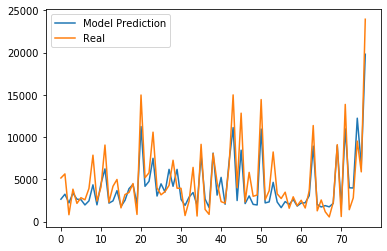

Prediction :  2644.776       real : 5152.0
Prediction :  3232.968       real : 5635.0
Prediction :  2203.632       real : 805.0
Prediction :  3366.648       real : 3829.0
Prediction :  2644.776       real : 2149.0
Prediction :  2591.304       real : 2821.0
Prediction :  1963.008       real : 2569.0
Prediction :  2444.2560000000003       real : 3913.0
Prediction :  4342.512000000001       real : 7854.0
Prediction :  1976.376       real : 2422.0
Prediction :  4462.8240000000005       real : 4067.0
Prediction :  6227.4       real : 9051.0
Prediction :  2176.8959999999997       real : 2282.0
Prediction :  2444.2560000000003       real : 4172.0
Prediction :  3660.744       real : 4977.0
Prediction :  1775.856       real : 1617.0
Prediction :  2511.096       real : 3192.0
Prediction :  3888.0       real : 3437.0
Prediction :  4395.984       real : 4494.0
Prediction :  2029.848       real : 840.0
Prediction :  11240.4       real : 14973.0
Prediction :  4168.728       real : 5180.0
Prediction 

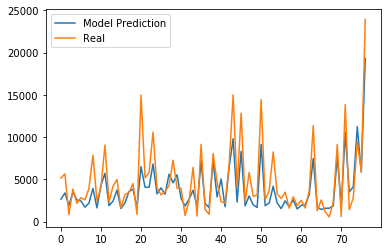

Prediction :  2644.776       real : 5152.0
Prediction :  3380.016       real : 5635.0
Prediction :  1896.168       real : 805.0
Prediction :  3486.96       real : 3829.0
Prediction :  2564.568       real : 2149.0
Prediction :  2430.888       real : 2821.0
Prediction :  1695.648       real : 2569.0
Prediction :  2176.8959999999997       real : 3913.0
Prediction :  3914.736       real : 7854.0
Prediction :  1615.44       real : 2422.0
Prediction :  4289.04       real : 4067.0
Prediction :  5706.048       real : 9051.0
Prediction :  1882.8       real : 2282.0
Prediction :  2404.152       real : 4172.0
Prediction :  3727.584       real : 4977.0
Prediction :  1535.232       real : 1617.0
Prediction :  2203.632       real : 3192.0
Prediction :  3540.432       real : 3437.0
Prediction :  3847.896       real : 4494.0
Prediction :  1655.544       real : 840.0
Prediction :  6494.76       real : 14973.0
Prediction :  4075.152       real : 5180.0
Prediction :  4048.416       real : 5775.0
Predicti

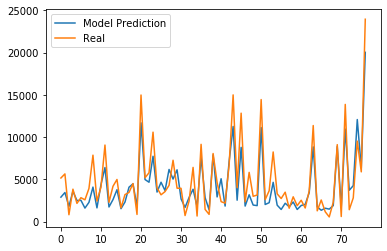

Prediction :  2885.4       real : 5152.0
Prediction :  3433.488       real : 5635.0
Prediction :  1789.224       real : 805.0
Prediction :  3580.536       real : 3829.0
Prediction :  2484.3599999999997       real : 2149.0
Prediction :  2511.096       real : 2821.0
Prediction :  1588.704       real : 2569.0
Prediction :  2270.4719999999998       real : 3913.0
Prediction :  4075.152       real : 7854.0
Prediction :  1615.44       real : 2422.0
Prediction :  4369.248       real : 4067.0
Prediction :  6387.816       real : 9051.0
Prediction :  1722.384       real : 2282.0
Prediction :  2591.304       real : 4172.0
Prediction :  3767.688       real : 4977.0
Prediction :  1521.864       real : 1617.0
Prediction :  2310.576       real : 3192.0
Prediction :  4061.784       real : 3437.0
Prediction :  4462.8240000000005       real : 4494.0
Prediction :  1749.12       real : 840.0
Prediction :  11681.544       real : 14973.0
Prediction :  4970.808       real : 5180.0
Prediction :  4649.976      

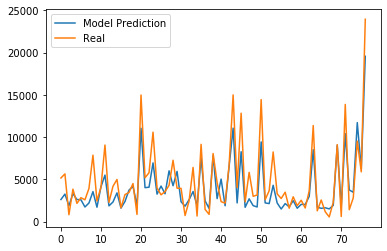

Prediction :  2604.672       real : 5152.0
Prediction :  3246.336       real : 5635.0
Prediction :  1856.064       real : 805.0
Prediction :  3299.808       real : 3829.0
Prediction :  2604.672       real : 2149.0
Prediction :  2577.9359999999997       real : 2821.0
Prediction :  1722.384       real : 2569.0
Prediction :  2190.264       real : 3913.0
Prediction :  3540.432       real : 7854.0
Prediction :  1695.648       real : 2422.0
Prediction :  4115.255999999999       real : 4067.0
Prediction :  5492.16       real : 9051.0
Prediction :  1856.064       real : 2282.0
Prediction :  2310.576       real : 4172.0
Prediction :  3393.384       real : 4977.0
Prediction :  1588.704       real : 1617.0
Prediction :  2377.416       real : 3192.0
Prediction :  3714.216       real : 3437.0
Prediction :  4168.728       real : 4494.0
Prediction :  1869.432       real : 840.0
Prediction :  11039.88       real : 14973.0
Prediction :  4008.312       real : 5180.0
Prediction :  4061.784       real : 5

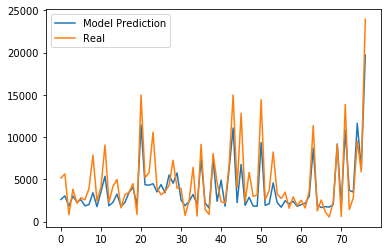

Prediction :  2604.672       real : 5152.0
Prediction :  3032.448       real : 5635.0
Prediction :  1829.328       real : 805.0
Prediction :  3019.08       real : 3829.0
Prediction :  2310.576       real : 2149.0
Prediction :  2577.9359999999997       real : 2821.0
Prediction :  1856.064       real : 2569.0
Prediction :  2003.112       real : 3913.0
Prediction :  3406.752       real : 7854.0
Prediction :  1762.488       real : 2422.0
Prediction :  3527.064       real : 4067.0
Prediction :  5358.48       real : 9051.0
Prediction :  1856.064       real : 2282.0
Prediction :  2270.4719999999998       real : 4172.0
Prediction :  3246.336       real : 4977.0
Prediction :  1762.488       real : 1617.0
Prediction :  2270.4719999999998       real : 3192.0
Prediction :  3446.856       real : 3437.0
Prediction :  4035.048       real : 4494.0
Prediction :  1909.536       real : 840.0
Prediction :  11440.92       real : 14973.0
Prediction :  4355.88       real : 5180.0
Prediction :  4302.407999999

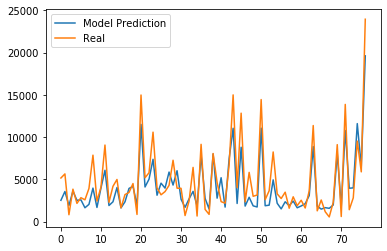

Prediction :  2511.096       real : 5152.0
Prediction :  3553.8       real : 5635.0
Prediction :  1896.168       real : 805.0
Prediction :  3593.904       real : 3829.0
Prediction :  2511.096       real : 2149.0
Prediction :  2564.568       real : 2821.0
Prediction :  1628.808       real : 2569.0
Prediction :  2029.848       real : 3913.0
Prediction :  3954.84       real : 7854.0
Prediction :  1668.912       real : 2422.0
Prediction :  3968.208       real : 4067.0
Prediction :  6066.984       real : 9051.0
Prediction :  1896.168       real : 2282.0
Prediction :  2337.312       real : 4172.0
Prediction :  4021.68       real : 4977.0
Prediction :  1615.44       real : 1617.0
Prediction :  2337.312       real : 3192.0
Prediction :  3914.736       real : 3437.0
Prediction :  4168.728       real : 4494.0
Prediction :  1896.168       real : 840.0
Prediction :  11494.392       real : 14973.0
Prediction :  4088.52       real : 5180.0
Prediction :  5010.912       real : 5775.0
Prediction :  736

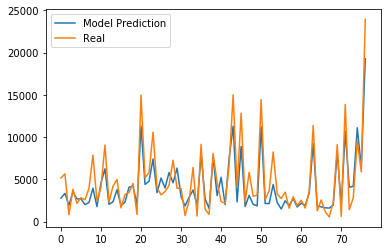

Prediction :  2765.088       real : 5152.0
Prediction :  3326.544       real : 5635.0
Prediction :  1896.168       real : 805.0
Prediction :  3527.064       real : 3829.0
Prediction :  2671.512       real : 2149.0
Prediction :  2684.88       real : 2821.0
Prediction :  2003.112       real : 2569.0
Prediction :  2243.736       real : 3913.0
Prediction :  3941.472       real : 7854.0
Prediction :  1762.488       real : 2422.0
Prediction :  4556.4       real : 4067.0
Prediction :  6240.768       real : 9051.0
Prediction :  2029.848       real : 2282.0
Prediction :  2337.312       real : 4172.0
Prediction :  3767.688       real : 4977.0
Prediction :  1882.8       real : 1617.0
Prediction :  2297.208       real : 3192.0
Prediction :  4061.784       real : 3437.0
Prediction :  4208.832       real : 4494.0
Prediction :  1989.744       real : 840.0
Prediction :  11293.872       real : 14973.0
Prediction :  4395.984       real : 5180.0
Prediction :  4756.92       real : 5775.0
Prediction :  740

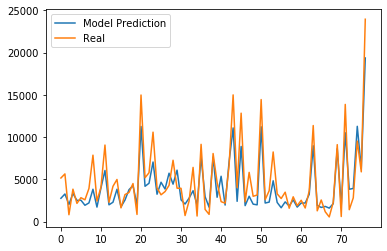

Prediction :  2751.72       real : 5152.0
Prediction :  3259.704       real : 5635.0
Prediction :  2016.48       real : 805.0
Prediction :  3326.544       real : 3829.0
Prediction :  2497.728       real : 2149.0
Prediction :  2524.464       real : 2821.0
Prediction :  1922.904       real : 2569.0
Prediction :  2203.632       real : 3913.0
Prediction :  3821.16       real : 7854.0
Prediction :  1709.016       real : 2422.0
Prediction :  3981.576       real : 4067.0
Prediction :  6040.248       real : 9051.0
Prediction :  1976.376       real : 2282.0
Prediction :  2283.84       real : 4172.0
Prediction :  3821.16       real : 4977.0
Prediction :  1735.752       real : 1617.0
Prediction :  2551.2       real : 3192.0
Prediction :  3767.688       real : 3437.0
Prediction :  4248.936       real : 4494.0
Prediction :  1936.272       real : 840.0
Prediction :  11253.768       real : 14973.0
Prediction :  4168.728       real : 5180.0
Prediction :  4529.664000000001       real : 5775.0
Predictio

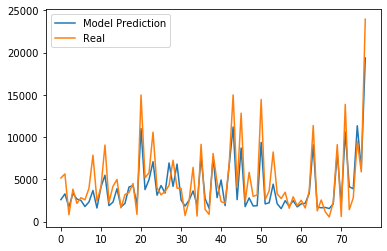

Prediction :  2591.304       real : 5152.0
Prediction :  3273.072       real : 5635.0
Prediction :  1709.016       real : 805.0
Prediction :  3339.912       real : 3829.0
Prediction :  2658.144       real : 2149.0
Prediction :  2497.728       real : 2821.0
Prediction :  1775.856       real : 2569.0
Prediction :  2310.576       real : 3913.0
Prediction :  3674.112       real : 7854.0
Prediction :  1602.072       real : 2422.0
Prediction :  4088.52       real : 4067.0
Prediction :  5478.792       real : 9051.0
Prediction :  1882.8       real : 2282.0
Prediction :  2297.208       real : 4172.0
Prediction :  3888.0       real : 4977.0
Prediction :  1722.384       real : 1617.0
Prediction :  2150.16       real : 3192.0
Prediction :  4088.52       real : 3437.0
Prediction :  4248.936       real : 4494.0
Prediction :  1989.744       real : 840.0
Prediction :  10999.776       real : 14973.0
Prediction :  3781.056       real : 5180.0
Prediction :  4957.44       real : 5775.0
Prediction :  7082.

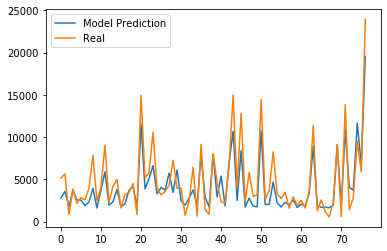

Prediction :  2765.088       real : 5152.0
Prediction :  3567.168       real : 5635.0
Prediction :  1775.856       real : 805.0
Prediction :  3700.848       real : 3829.0
Prediction :  2537.8320000000003       real : 2149.0
Prediction :  2537.8320000000003       real : 2821.0
Prediction :  1882.8       real : 2569.0
Prediction :  2297.208       real : 3913.0
Prediction :  3928.104       real : 7854.0
Prediction :  1602.072       real : 2422.0
Prediction :  3740.952       real : 4067.0
Prediction :  5866.464       real : 9051.0
Prediction :  1936.272       real : 2282.0
Prediction :  2337.312       real : 4172.0
Prediction :  3781.056       real : 4977.0
Prediction :  1749.12       real : 1617.0
Prediction :  2096.688       real : 3192.0
Prediction :  3674.112       real : 3437.0
Prediction :  4155.360000000001       real : 4494.0
Prediction :  1789.224       real : 840.0
Prediction :  11521.128       real : 14973.0
Prediction :  3861.264       real : 5180.0
Prediction :  5091.12       

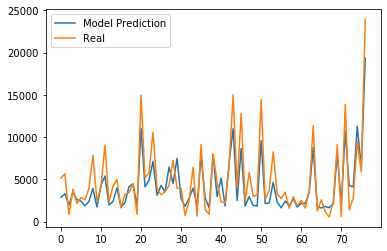

Prediction :  2872.032       real : 5152.0
Prediction :  3286.44       real : 5635.0
Prediction :  1936.272       real : 805.0
Prediction :  3433.488       real : 3829.0
Prediction :  2591.304       real : 2149.0
Prediction :  2430.888       real : 2821.0
Prediction :  1856.064       real : 2569.0
Prediction :  2377.416       real : 3913.0
Prediction :  3914.736       real : 7854.0
Prediction :  1722.384       real : 2422.0
Prediction :  4289.04       real : 4067.0
Prediction :  5385.216       real : 9051.0
Prediction :  1949.64       real : 2282.0
Prediction :  2377.416       real : 4172.0
Prediction :  3994.944       real : 4977.0
Prediction :  1735.752       real : 1617.0
Prediction :  2230.368       real : 3192.0
Prediction :  4115.255999999999       real : 3437.0
Prediction :  4462.8240000000005       real : 4494.0
Prediction :  1842.696       real : 840.0
Prediction :  10999.776       real : 14973.0
Prediction :  4101.888       real : 5180.0
Prediction :  4890.6       real : 5775

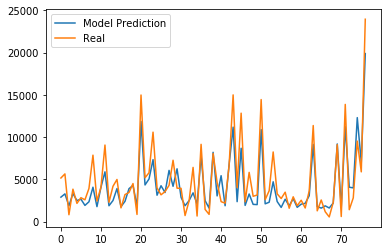

Prediction :  2885.4       real : 5152.0
Prediction :  3273.072       real : 5635.0
Prediction :  1856.064       real : 805.0
Prediction :  3313.176       real : 3829.0
Prediction :  2484.3599999999997       real : 2149.0
Prediction :  2644.776       real : 2821.0
Prediction :  1909.536       real : 2569.0
Prediction :  2337.312       real : 3913.0
Prediction :  4061.784       real : 7854.0
Prediction :  1762.488       real : 2422.0
Prediction :  4061.784       real : 4067.0
Prediction :  5879.832       real : 9051.0
Prediction :  1869.432       real : 2282.0
Prediction :  2484.3599999999997       real : 4172.0
Prediction :  3901.368       real : 4977.0
Prediction :  1762.488       real : 1617.0
Prediction :  2390.784       real : 3192.0
Prediction :  3888.0       real : 3437.0
Prediction :  4275.6720000000005       real : 4494.0
Prediction :  1789.224       real : 840.0
Prediction :  11841.96       real : 14973.0
Prediction :  4329.144       real : 5180.0
Prediction :  5037.648       

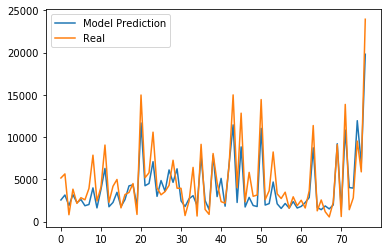

Prediction :  2551.2       real : 5152.0
Prediction :  3139.392       real : 5635.0
Prediction :  1882.8       real : 805.0
Prediction :  3179.496       real : 3829.0
Prediction :  2230.368       real : 2149.0
Prediction :  2604.672       real : 2821.0
Prediction :  1869.432       real : 2569.0
Prediction :  2016.48       real : 3913.0
Prediction :  3981.576       real : 7854.0
Prediction :  1615.44       real : 2422.0
Prediction :  3807.792       real : 4067.0
Prediction :  6280.872       real : 9051.0
Prediction :  1749.12       real : 2282.0
Prediction :  2257.1040000000003       real : 4172.0
Prediction :  3460.224       real : 4977.0
Prediction :  1762.488       real : 1617.0
Prediction :  2604.672       real : 3192.0
Prediction :  4222.2       real : 3437.0
Prediction :  4342.512000000001       real : 4494.0
Prediction :  1815.96       real : 840.0
Prediction :  11668.176       real : 14973.0
Prediction :  4235.568       real : 5180.0
Prediction :  4502.928       real : 5775.0
Pr

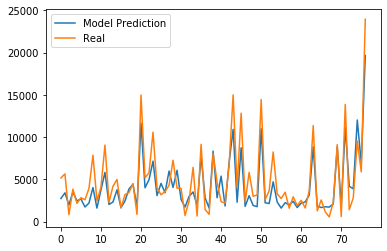

Prediction :  2724.984       real : 5152.0
Prediction :  3393.384       real : 5635.0
Prediction :  1963.008       real : 805.0
Prediction :  3513.696       real : 3829.0
Prediction :  2444.2560000000003       real : 2149.0
Prediction :  2671.512       real : 2821.0
Prediction :  1722.384       real : 2569.0
Prediction :  2176.8959999999997       real : 3913.0
Prediction :  4021.68       real : 7854.0
Prediction :  1588.704       real : 2422.0
Prediction :  3740.952       real : 4067.0
Prediction :  5812.992       real : 9051.0
Prediction :  2016.48       real : 2282.0
Prediction :  2310.576       real : 4172.0
Prediction :  3754.32       real : 4977.0
Prediction :  1628.808       real : 1617.0
Prediction :  2444.2560000000003       real : 3192.0
Prediction :  3861.264       real : 3437.0
Prediction :  4395.984       real : 4494.0
Prediction :  1762.488       real : 840.0
Prediction :  11654.808       real : 14973.0
Prediction :  3994.944       real : 5180.0
Prediction :  4957.44      

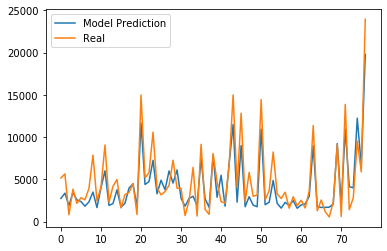

Prediction :  2738.352       real : 5152.0
Prediction :  3353.28       real : 5635.0
Prediction :  1882.8       real : 805.0
Prediction :  3433.488       real : 3829.0
Prediction :  2564.568       real : 2149.0
Prediction :  2364.048       real : 2821.0
Prediction :  1815.96       real : 2569.0
Prediction :  2323.944       real : 3913.0
Prediction :  3486.96       real : 7854.0
Prediction :  1655.544       real : 2422.0
Prediction :  3981.576       real : 4067.0
Prediction :  6000.144       real : 9051.0
Prediction :  1909.536       real : 2282.0
Prediction :  2123.424       real : 4172.0
Prediction :  3754.32       real : 4977.0
Prediction :  1695.648       real : 1617.0
Prediction :  2163.5280000000002       real : 3192.0
Prediction :  3954.84       real : 3437.0
Prediction :  4462.8240000000005       real : 4494.0
Prediction :  1709.016       real : 840.0
Prediction :  11668.176       real : 14973.0
Prediction :  4382.616       real : 5180.0
Prediction :  4730.184       real : 5775.

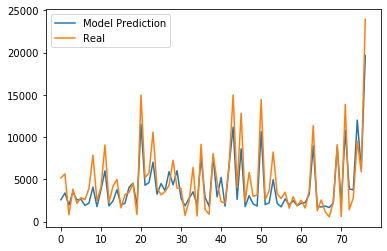

Prediction :  2577.9359999999997       real : 5152.0
Prediction :  3380.016       real : 5635.0
Prediction :  1936.272       real : 805.0
Prediction :  3513.696       real : 3829.0
Prediction :  2551.2       real : 2149.0
Prediction :  2631.408       real : 2821.0
Prediction :  1909.536       real : 2569.0
Prediction :  2176.8959999999997       real : 3913.0
Prediction :  4075.152       real : 7854.0
Prediction :  1762.488       real : 2422.0
Prediction :  3754.32       real : 4067.0
Prediction :  6000.144       real : 9051.0
Prediction :  1856.064       real : 2282.0
Prediction :  2430.888       real : 4172.0
Prediction :  3781.056       real : 4977.0
Prediction :  1936.272       real : 1617.0
Prediction :  2176.8959999999997       real : 3192.0
Prediction :  4035.048       real : 3437.0
Prediction :  4543.032       real : 4494.0
Prediction :  1815.96       real : 840.0
Prediction :  11534.496       real : 14973.0
Prediction :  4289.04       real : 5180.0
Prediction :  4623.24       r

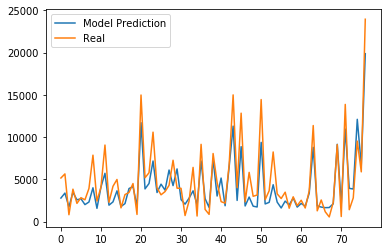

Prediction :  2778.456       real : 5152.0
Prediction :  3366.648       real : 5635.0
Prediction :  1722.384       real : 805.0
Prediction :  3460.224       real : 3829.0
Prediction :  2564.568       real : 2149.0
Prediction :  2698.248       real : 2821.0
Prediction :  2003.112       real : 2569.0
Prediction :  2310.576       real : 3913.0
Prediction :  3994.944       real : 7854.0
Prediction :  1561.9679999999998       real : 2422.0
Prediction :  4088.52       real : 4067.0
Prediction :  5706.048       real : 9051.0
Prediction :  1936.272       real : 2282.0
Prediction :  2323.944       real : 4172.0
Prediction :  3634.008       real : 4977.0
Prediction :  1775.856       real : 1617.0
Prediction :  2123.424       real : 3192.0
Prediction :  3901.368       real : 3437.0
Prediction :  4141.992       real : 4494.0
Prediction :  1775.856       real : 840.0
Prediction :  11694.912       real : 14973.0
Prediction :  3861.264       real : 5180.0
Prediction :  4502.928       real : 5775.0
Pr

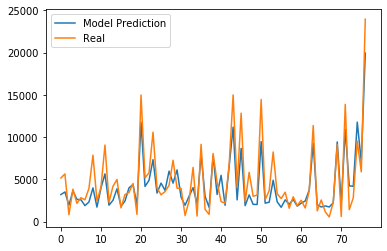

Prediction :  3192.864       real : 5152.0
Prediction :  3500.328       real : 5635.0
Prediction :  1936.272       real : 805.0
Prediction :  3620.64       real : 3829.0
Prediction :  2618.04       real : 2149.0
Prediction :  2577.9359999999997       real : 2821.0
Prediction :  1882.8       real : 2569.0
Prediction :  2310.576       real : 3913.0
Prediction :  3981.576       real : 7854.0
Prediction :  1709.016       real : 2422.0
Prediction :  3968.208       real : 4067.0
Prediction :  5639.208       real : 9051.0
Prediction :  1936.272       real : 2282.0
Prediction :  2511.096       real : 4172.0
Prediction :  3874.632       real : 4977.0
Prediction :  1802.592       real : 1617.0
Prediction :  2430.888       real : 3192.0
Prediction :  3981.576       real : 3437.0
Prediction :  4382.616       real : 4494.0
Prediction :  1949.64       real : 840.0
Prediction :  11748.384       real : 14973.0
Prediction :  4155.360000000001       real : 5180.0
Prediction :  4877.232       real : 5775

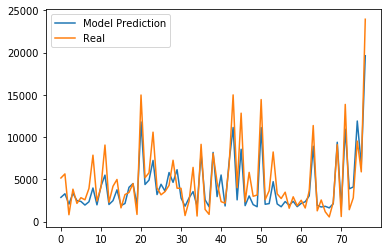

Prediction :  2858.664       real : 5152.0
Prediction :  3286.44       real : 5635.0
Prediction :  2056.584       real : 805.0
Prediction :  3353.28       real : 3829.0
Prediction :  2470.992       real : 2149.0
Prediction :  2377.416       real : 2821.0
Prediction :  1949.64       real : 2569.0
Prediction :  2337.312       real : 3913.0
Prediction :  3968.208       real : 7854.0
Prediction :  1976.376       real : 2422.0
Prediction :  4182.096       real : 4067.0
Prediction :  5492.16       real : 9051.0
Prediction :  2016.48       real : 2282.0
Prediction :  2470.992       real : 4172.0
Prediction :  3754.32       real : 4977.0
Prediction :  1882.8       real : 1617.0
Prediction :  2136.792       real : 3192.0
Prediction :  4048.416       real : 3437.0
Prediction :  4489.5599999999995       real : 4494.0
Prediction :  1922.904       real : 840.0
Prediction :  11788.488       real : 14973.0
Prediction :  4382.616       real : 5180.0
Prediction :  4903.968       real : 5775.0
Predictio

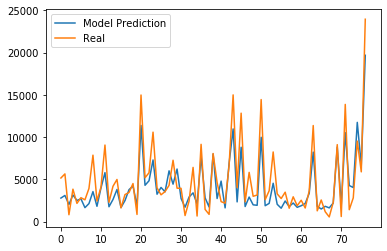

Prediction :  2778.456       real : 5152.0
Prediction :  3085.92       real : 5635.0
Prediction :  2016.48       real : 805.0
Prediction :  3139.392       real : 3829.0
Prediction :  2497.728       real : 2149.0
Prediction :  2684.88       real : 2821.0
Prediction :  1642.176       real : 2569.0
Prediction :  2123.424       real : 3913.0
Prediction :  3540.432       real : 7854.0
Prediction :  1802.592       real : 2422.0
Prediction :  3968.208       real : 4067.0
Prediction :  5786.256       real : 9051.0
Prediction :  1749.12       real : 2282.0
Prediction :  2604.672       real : 4172.0
Prediction :  3794.424       real : 4977.0
Prediction :  1655.544       real : 1617.0
Prediction :  2484.3599999999997       real : 3192.0
Prediction :  3767.688       real : 3437.0
Prediction :  4208.832       real : 4494.0
Prediction :  1829.328       real : 840.0
Prediction :  11374.08       real : 14973.0
Prediction :  4289.04       real : 5180.0
Prediction :  4823.76       real : 5775.0
Predicti

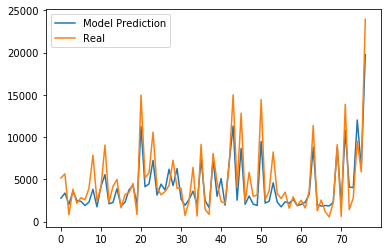

Prediction :  2765.088       real : 5152.0
Prediction :  3366.648       real : 5635.0
Prediction :  2029.848       real : 805.0
Prediction :  3553.8       real : 3829.0
Prediction :  2484.3599999999997       real : 2149.0
Prediction :  2390.784       real : 2821.0
Prediction :  1896.168       real : 2569.0
Prediction :  2283.84       real : 3913.0
Prediction :  3807.792       real : 7854.0
Prediction :  1735.752       real : 2422.0
Prediction :  4168.728       real : 4067.0
Prediction :  5545.632       real : 9051.0
Prediction :  2110.056       real : 2282.0
Prediction :  2257.1040000000003       real : 4172.0
Prediction :  3888.0       real : 4977.0
Prediction :  1842.696       real : 1617.0
Prediction :  2270.4719999999998       real : 3192.0
Prediction :  3740.952       real : 3437.0
Prediction :  4289.04       real : 4494.0
Prediction :  1989.744       real : 840.0
Prediction :  11240.4       real : 14973.0
Prediction :  4115.255999999999       real : 5180.0
Prediction :  4462.8240

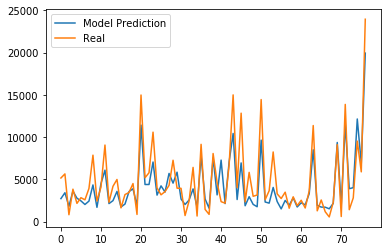

Prediction :  2711.616       real : 5152.0
Prediction :  3406.752       real : 5635.0
Prediction :  1802.592       real : 805.0
Prediction :  3593.904       real : 3829.0
Prediction :  2765.088       real : 2149.0
Prediction :  2444.2560000000003       real : 2821.0
Prediction :  2016.48       real : 2569.0
Prediction :  2417.52       real : 3913.0
Prediction :  4329.144       real : 7854.0
Prediction :  1682.28       real : 2422.0
Prediction :  4489.5599999999995       real : 4067.0
Prediction :  6080.352       real : 9051.0
Prediction :  2123.424       real : 2282.0
Prediction :  2470.992       real : 4172.0
Prediction :  3567.168       real : 4977.0
Prediction :  1722.384       real : 1617.0
Prediction :  2069.952       real : 3192.0
Prediction :  3540.432       real : 3437.0
Prediction :  3874.632       real : 4494.0
Prediction :  1856.064       real : 840.0
Prediction :  11414.184       real : 14973.0
Prediction :  4382.616       real : 5180.0
Prediction :  4382.616       real : 5

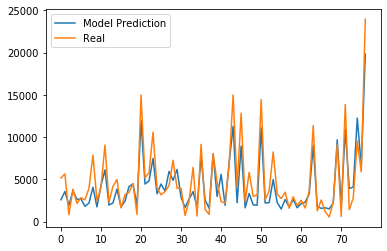

Prediction :  2577.9359999999997       real : 5152.0
Prediction :  3553.8       real : 5635.0
Prediction :  1922.904       real : 805.0
Prediction :  3620.64       real : 3829.0
Prediction :  2618.04       real : 2149.0
Prediction :  2671.512       real : 2821.0
Prediction :  1802.592       real : 2569.0
Prediction :  2176.8959999999997       real : 3913.0
Prediction :  4048.416       real : 7854.0
Prediction :  1735.752       real : 2422.0
Prediction :  4248.936       real : 4067.0
Prediction :  6107.088       real : 9051.0
Prediction :  1949.64       real : 2282.0
Prediction :  2203.632       real : 4172.0
Prediction :  3847.896       real : 4977.0
Prediction :  1735.752       real : 1617.0
Prediction :  2404.152       real : 3192.0
Prediction :  4141.992       real : 3437.0
Prediction :  4449.456       real : 4494.0
Prediction :  1882.8       real : 840.0
Prediction :  11935.536       real : 14973.0
Prediction :  4436.088       real : 5180.0
Prediction :  4810.392       real : 5775.

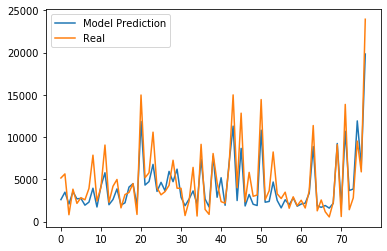

Prediction :  2591.304       real : 5152.0
Prediction :  3473.592       real : 5635.0
Prediction :  2069.952       real : 805.0
Prediction :  3527.064       real : 3829.0
Prediction :  2684.88       real : 2149.0
Prediction :  2738.352       real : 2821.0
Prediction :  1936.272       real : 2569.0
Prediction :  2297.208       real : 3913.0
Prediction :  3941.472       real : 7854.0
Prediction :  1722.384       real : 2422.0
Prediction :  4195.464       real : 4067.0
Prediction :  5772.888       real : 9051.0
Prediction :  1989.744       real : 2282.0
Prediction :  2604.672       real : 4172.0
Prediction :  3861.264       real : 4977.0
Prediction :  1936.272       real : 1617.0
Prediction :  2217.0       real : 3192.0
Prediction :  4075.152       real : 3437.0
Prediction :  4476.192       real : 4494.0
Prediction :  1856.064       real : 840.0
Prediction :  11841.96       real : 14973.0
Prediction :  4315.776       real : 5180.0
Prediction :  4730.184       real : 5775.0
Prediction :  6

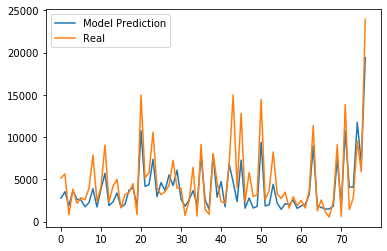

Prediction :  2751.72       real : 5152.0
Prediction :  3527.064       real : 5635.0
Prediction :  1869.432       real : 805.0
Prediction :  3647.376       real : 3829.0
Prediction :  2631.408       real : 2149.0
Prediction :  2564.568       real : 2821.0
Prediction :  1762.488       real : 2569.0
Prediction :  2230.368       real : 3913.0
Prediction :  3874.632       real : 7854.0
Prediction :  1722.384       real : 2422.0
Prediction :  3821.16       real : 4067.0
Prediction :  5706.048       real : 9051.0
Prediction :  1896.168       real : 2282.0
Prediction :  2310.576       real : 4172.0
Prediction :  3380.016       real : 4977.0
Prediction :  1695.648       real : 1617.0
Prediction :  2029.848       real : 3192.0
Prediction :  3714.216       real : 3437.0
Prediction :  3981.576       real : 4494.0
Prediction :  1829.328       real : 840.0
Prediction :  10759.152       real : 14973.0
Prediction :  4168.728       real : 5180.0
Prediction :  4355.88       real : 5775.0
Prediction :  

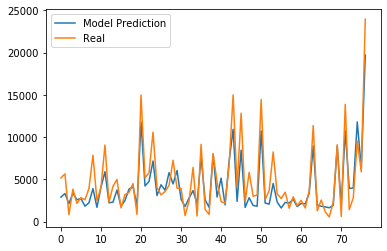

Prediction :  2885.4       real : 5152.0
Prediction :  3313.176       real : 5635.0
Prediction :  2123.424       real : 805.0
Prediction :  3366.648       real : 3829.0
Prediction :  2577.9359999999997       real : 2149.0
Prediction :  2724.984       real : 2821.0
Prediction :  1815.96       real : 2569.0
Prediction :  2217.0       real : 3913.0
Prediction :  3888.0       real : 7854.0
Prediction :  1682.28       real : 2422.0
Prediction :  4035.048       real : 4067.0
Prediction :  5893.2       real : 9051.0
Prediction :  2217.0       real : 2282.0
Prediction :  2297.208       real : 4172.0
Prediction :  3727.584       real : 4977.0
Prediction :  1802.592       real : 1617.0
Prediction :  2497.728       real : 3192.0
Prediction :  3834.528       real : 3437.0
Prediction :  4115.255999999999       real : 4494.0
Prediction :  1896.168       real : 840.0
Prediction :  11775.12       real : 14973.0
Prediction :  4208.832       real : 5180.0
Prediction :  4743.552       real : 5775.0
Predi

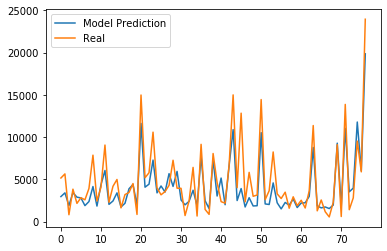

Prediction :  2952.24       real : 5152.0
Prediction :  3393.384       real : 5635.0
Prediction :  1882.8       real : 805.0
Prediction :  3420.12       real : 3829.0
Prediction :  2885.4       real : 2149.0
Prediction :  2791.824       real : 2821.0
Prediction :  1882.8       real : 2569.0
Prediction :  2364.048       real : 3913.0
Prediction :  4141.992       real : 7854.0
Prediction :  1829.328       real : 2422.0
Prediction :  4355.88       real : 4067.0
Prediction :  6040.248       real : 9051.0
Prediction :  2029.848       real : 2282.0
Prediction :  2430.888       real : 4172.0
Prediction :  3393.384       real : 4977.0
Prediction :  1722.384       real : 1617.0
Prediction :  2163.5280000000002       real : 3192.0
Prediction :  3874.632       real : 3437.0
Prediction :  4382.616       real : 4494.0
Prediction :  1909.536       real : 840.0
Prediction :  11614.704       real : 14973.0
Prediction :  4061.784       real : 5180.0
Prediction :  4422.719999999999       real : 5775.0
P

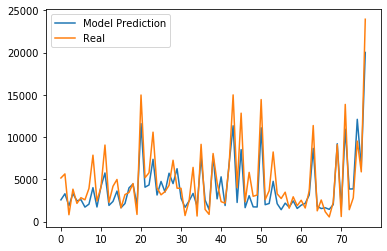

Prediction :  2564.568       real : 5152.0
Prediction :  3286.44       real : 5635.0
Prediction :  1856.064       real : 805.0
Prediction :  3313.176       real : 3829.0
Prediction :  2444.2560000000003       real : 2149.0
Prediction :  2591.304       real : 2821.0
Prediction :  1709.016       real : 2569.0
Prediction :  2056.584       real : 3913.0
Prediction :  4008.312       real : 7854.0
Prediction :  1722.384       real : 2422.0
Prediction :  4128.624       real : 4067.0
Prediction :  5746.152       real : 9051.0
Prediction :  1909.536       real : 2282.0
Prediction :  2377.416       real : 4172.0
Prediction :  3607.272       real : 4977.0
Prediction :  1628.808       real : 1617.0
Prediction :  2136.792       real : 3192.0
Prediction :  3981.576       real : 3437.0
Prediction :  4436.088       real : 4494.0
Prediction :  1922.904       real : 840.0
Prediction :  11587.968       real : 14973.0
Prediction :  4061.784       real : 5180.0
Prediction :  4329.144       real : 5775.0
Pr

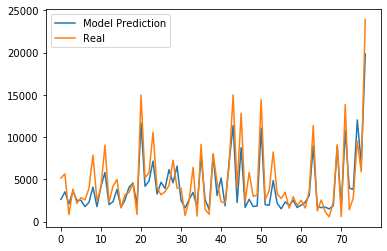

Prediction :  2618.04       real : 5152.0
Prediction :  3513.696       real : 5635.0
Prediction :  2096.688       real : 805.0
Prediction :  3580.536       real : 3829.0
Prediction :  2497.728       real : 2149.0
Prediction :  2511.096       real : 2821.0
Prediction :  1762.488       real : 2569.0
Prediction :  2257.1040000000003       real : 3913.0
Prediction :  4075.152       real : 7854.0
Prediction :  1762.488       real : 2422.0
Prediction :  4155.360000000001       real : 4067.0
Prediction :  5799.624       real : 9051.0
Prediction :  2003.112       real : 2282.0
Prediction :  2337.312       real : 4172.0
Prediction :  3794.424       real : 4977.0
Prediction :  1668.912       real : 1617.0
Prediction :  2564.568       real : 3192.0
Prediction :  4048.416       real : 3437.0
Prediction :  4569.768       real : 4494.0
Prediction :  1949.64       real : 840.0
Prediction :  11668.176       real : 14973.0
Prediction :  4168.728       real : 5180.0
Prediction :  4810.392       real : 5

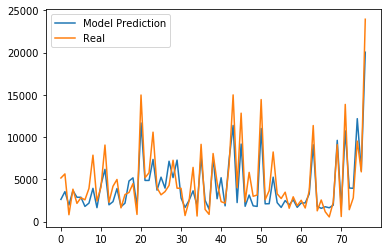

Prediction :  2618.04       real : 5152.0
Prediction :  3540.432       real : 5635.0
Prediction :  1949.64       real : 805.0
Prediction :  3660.744       real : 3829.0
Prediction :  2872.032       real : 2149.0
Prediction :  2872.032       real : 2821.0
Prediction :  1789.224       real : 2569.0
Prediction :  2176.8959999999997       real : 3913.0
Prediction :  3928.104       real : 7854.0
Prediction :  1642.176       real : 2422.0
Prediction :  4342.512000000001       real : 4067.0
Prediction :  6173.928       real : 9051.0
Prediction :  1976.376       real : 2282.0
Prediction :  2350.6800000000003       real : 4172.0
Prediction :  3901.368       real : 4977.0
Prediction :  1749.12       real : 1617.0
Prediction :  2176.8959999999997       real : 3192.0
Prediction :  4797.024       real : 3437.0
Prediction :  5171.328       real : 4494.0
Prediction :  1749.12       real : 840.0
Prediction :  11668.176       real : 14973.0
Prediction :  4863.864       real : 5180.0
Prediction :  4863.

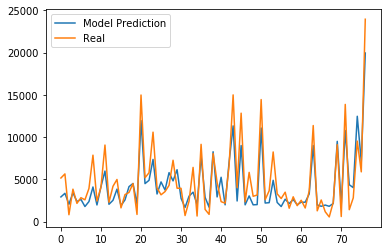

Prediction :  2912.136       real : 5152.0
Prediction :  3339.912       real : 5635.0
Prediction :  2043.216       real : 805.0
Prediction :  3406.752       real : 3829.0
Prediction :  2364.048       real : 2149.0
Prediction :  2618.04       real : 2821.0
Prediction :  1775.856       real : 2569.0
Prediction :  2364.048       real : 3913.0
Prediction :  4088.52       real : 7854.0
Prediction :  1963.008       real : 2422.0
Prediction :  4128.624       real : 4067.0
Prediction :  5973.408       real : 9051.0
Prediction :  2043.216       real : 2282.0
Prediction :  2511.096       real : 4172.0
Prediction :  3834.528       real : 4977.0
Prediction :  1882.8       real : 1617.0
Prediction :  2564.568       real : 3192.0
Prediction :  4128.624       real : 3437.0
Prediction :  4502.928       real : 4494.0
Prediction :  2043.216       real : 840.0
Prediction :  11948.904       real : 14973.0
Prediction :  4489.5599999999995       real : 5180.0
Prediction :  4877.232       real : 5775.0
Predi

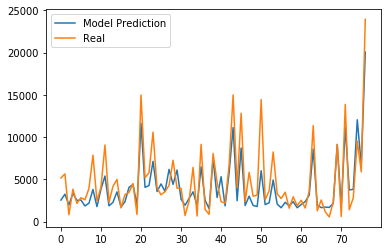

Prediction :  2537.8320000000003       real : 5152.0
Prediction :  3232.968       real : 5635.0
Prediction :  1963.008       real : 805.0
Prediction :  3339.912       real : 3829.0
Prediction :  2497.728       real : 2149.0
Prediction :  2551.2       real : 2821.0
Prediction :  1842.696       real : 2569.0
Prediction :  2163.5280000000002       real : 3913.0
Prediction :  3794.424       real : 7854.0
Prediction :  1762.488       real : 2422.0
Prediction :  3834.528       real : 4067.0
Prediction :  5385.216       real : 9051.0
Prediction :  1856.064       real : 2282.0
Prediction :  2270.4719999999998       real : 4172.0
Prediction :  3513.696       real : 4977.0
Prediction :  1722.384       real : 1617.0
Prediction :  2350.6800000000003       real : 3192.0
Prediction :  4048.416       real : 3437.0
Prediction :  4382.616       real : 4494.0
Prediction :  1922.904       real : 840.0
Prediction :  11628.072       real : 14973.0
Prediction :  4048.416       real : 5180.0
Prediction :  42

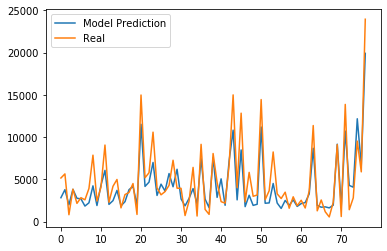

Prediction :  2818.56       real : 5152.0
Prediction :  3767.688       real : 5635.0
Prediction :  1976.376       real : 805.0
Prediction :  3807.792       real : 3829.0
Prediction :  2751.72       real : 2149.0
Prediction :  2684.88       real : 2821.0
Prediction :  1829.328       real : 2569.0
Prediction :  2217.0       real : 3913.0
Prediction :  4222.2       real : 7854.0
Prediction :  1896.168       real : 2422.0
Prediction :  4302.407999999999       real : 4067.0
Prediction :  6053.616       real : 9051.0
Prediction :  2029.848       real : 2282.0
Prediction :  2470.992       real : 4172.0
Prediction :  3687.48       real : 4977.0
Prediction :  1856.064       real : 1617.0
Prediction :  2350.6800000000003       real : 3192.0
Prediction :  3767.688       real : 3437.0
Prediction :  4168.728       real : 4494.0
Prediction :  1922.904       real : 840.0
Prediction :  11507.76       real : 14973.0
Prediction :  4155.360000000001       real : 5180.0
Prediction :  4663.344       real :

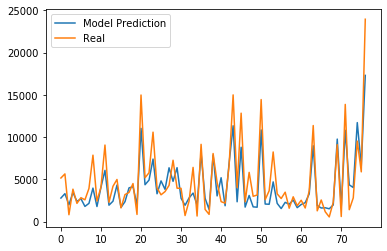

Prediction :  2778.456       real : 5152.0
Prediction :  3299.808       real : 5635.0
Prediction :  1976.376       real : 805.0
Prediction :  3446.856       real : 3829.0
Prediction :  2377.416       real : 2149.0
Prediction :  2698.248       real : 2821.0
Prediction :  1789.224       real : 2569.0
Prediction :  2150.16       real : 3913.0
Prediction :  3954.84       real : 7854.0
Prediction :  1775.856       real : 2422.0
Prediction :  4061.784       real : 4067.0
Prediction :  6053.616       real : 9051.0
Prediction :  1936.272       real : 2282.0
Prediction :  2404.152       real : 4172.0
Prediction :  4315.776       real : 4977.0
Prediction :  1668.912       real : 1617.0
Prediction :  2350.6800000000003       real : 3192.0
Prediction :  3981.576       real : 3437.0
Prediction :  4128.624       real : 4494.0
Prediction :  1936.272       real : 840.0
Prediction :  11026.512       real : 14973.0
Prediction :  4355.88       real : 5180.0
Prediction :  4903.968       real : 5775.0
Pred

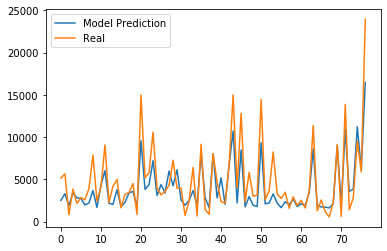

Prediction :  2511.096       real : 5152.0
Prediction :  3286.44       real : 5635.0
Prediction :  1882.8       real : 805.0
Prediction :  3393.384       real : 3829.0
Prediction :  2818.56       real : 2149.0
Prediction :  2724.984       real : 2821.0
Prediction :  1963.008       real : 2569.0
Prediction :  2190.264       real : 3913.0
Prediction :  3660.744       real : 7854.0
Prediction :  1668.912       real : 2422.0
Prediction :  4302.407999999999       real : 4067.0
Prediction :  6013.512       real : 9051.0
Prediction :  2163.5280000000002       real : 2282.0
Prediction :  2029.848       real : 4172.0
Prediction :  3767.688       real : 4977.0
Prediction :  1749.12       real : 1617.0
Prediction :  2257.1040000000003       real : 3192.0
Prediction :  3393.384       real : 3437.0
Prediction :  3567.168       real : 4494.0
Prediction :  1775.856       real : 840.0
Prediction :  9556.032       real : 14973.0
Prediction :  3807.792       real : 5180.0
Prediction :  4355.88       rea

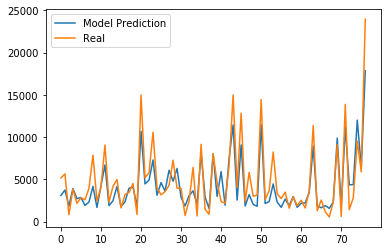

Prediction :  3085.92       real : 5152.0
Prediction :  3727.584       real : 5635.0
Prediction :  1842.696       real : 805.0
Prediction :  3901.368       real : 3829.0
Prediction :  2711.616       real : 2149.0
Prediction :  2845.296       real : 2821.0
Prediction :  1909.536       real : 2569.0
Prediction :  2297.208       real : 3913.0
Prediction :  4168.728       real : 7854.0
Prediction :  1668.912       real : 2422.0
Prediction :  4222.2       real : 4067.0
Prediction :  6695.28       real : 9051.0
Prediction :  1882.8       real : 2282.0
Prediction :  2457.624       real : 4172.0
Prediction :  4155.360000000001       real : 4977.0
Prediction :  1762.488       real : 1617.0
Prediction :  2337.312       real : 3192.0
Prediction :  3941.472       real : 3437.0
Prediction :  4075.152       real : 4494.0
Prediction :  1802.592       real : 840.0
Prediction :  10678.944       real : 14973.0
Prediction :  4449.456       real : 5180.0
Prediction :  4903.968       real : 5775.0
Predicti

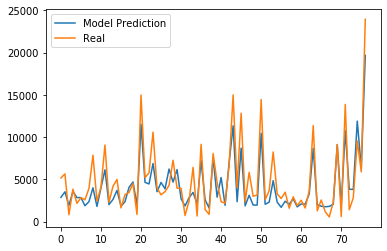

Prediction :  2858.664       real : 5152.0
Prediction :  3513.696       real : 5635.0
Prediction :  1909.536       real : 805.0
Prediction :  3567.168       real : 3829.0
Prediction :  2831.928       real : 2149.0
Prediction :  2831.928       real : 2821.0
Prediction :  1869.432       real : 2569.0
Prediction :  2350.6800000000003       real : 3913.0
Prediction :  3994.944       real : 7854.0
Prediction :  1789.224       real : 2422.0
Prediction :  3981.576       real : 4067.0
Prediction :  6120.456       real : 9051.0
Prediction :  2003.112       real : 2282.0
Prediction :  2618.04       real : 4172.0
Prediction :  3687.48       real : 4977.0
Prediction :  1815.96       real : 1617.0
Prediction :  2350.6800000000003       real : 3192.0
Prediction :  4035.048       real : 3437.0
Prediction :  4676.712       real : 4494.0
Prediction :  1909.536       real : 840.0
Prediction :  11507.76       real : 14973.0
Prediction :  4636.608       real : 5180.0
Prediction :  4449.456       real : 57

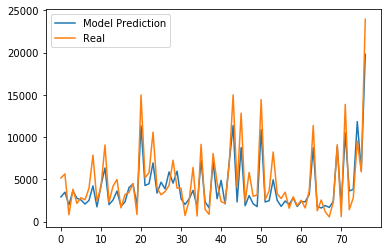

Prediction :  2912.136       real : 5152.0
Prediction :  3473.592       real : 5635.0
Prediction :  1963.008       real : 805.0
Prediction :  3620.64       real : 3829.0
Prediction :  2751.72       real : 2149.0
Prediction :  2564.568       real : 2821.0
Prediction :  2069.952       real : 2569.0
Prediction :  2484.3599999999997       real : 3913.0
Prediction :  4222.2       real : 7854.0
Prediction :  1735.752       real : 2422.0
Prediction :  4262.304       real : 4067.0
Prediction :  6334.344       real : 9051.0
Prediction :  2003.112       real : 2282.0
Prediction :  2537.8320000000003       real : 4172.0
Prediction :  3607.272       real : 4977.0
Prediction :  1802.592       real : 1617.0
Prediction :  2323.944       real : 3192.0
Prediction :  4021.68       real : 3437.0
Prediction :  4436.088       real : 4494.0
Prediction :  1896.168       real : 840.0
Prediction :  11333.976       real : 14973.0
Prediction :  4262.304       real : 5180.0
Prediction :  4476.192       real : 577

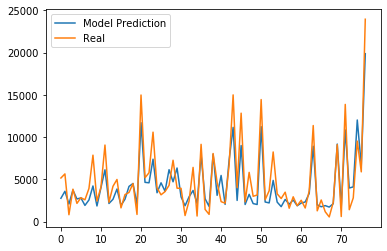

Prediction :  2751.72       real : 5152.0
Prediction :  3580.536       real : 5635.0
Prediction :  2069.952       real : 805.0
Prediction :  3714.216       real : 3829.0
Prediction :  2671.512       real : 2149.0
Prediction :  2791.824       real : 2821.0
Prediction :  1909.536       real : 2569.0
Prediction :  2551.2       real : 3913.0
Prediction :  4208.832       real : 7854.0
Prediction :  1842.696       real : 2422.0
Prediction :  4021.68       real : 4067.0
Prediction :  6120.456       real : 9051.0
Prediction :  2136.792       real : 2282.0
Prediction :  2631.408       real : 4172.0
Prediction :  3847.896       real : 4977.0
Prediction :  1909.536       real : 1617.0
Prediction :  2644.776       real : 3192.0
Prediction :  4155.360000000001       real : 3437.0
Prediction :  4502.928       real : 4494.0
Prediction :  2003.112       real : 840.0
Prediction :  11694.912       real : 14973.0
Prediction :  4636.608       real : 5180.0
Prediction :  4583.136       real : 5775.0
Predic

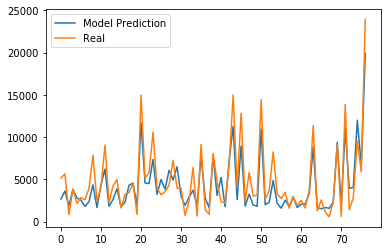

Prediction :  2658.144       real : 5152.0
Prediction :  3607.272       real : 5635.0
Prediction :  1842.696       real : 805.0
Prediction :  3807.792       real : 3829.0
Prediction :  2778.456       real : 2149.0
Prediction :  2537.8320000000003       real : 2821.0
Prediction :  1789.224       real : 2569.0
Prediction :  2337.312       real : 3913.0
Prediction :  4342.512000000001       real : 7854.0
Prediction :  1655.544       real : 2422.0
Prediction :  4329.144       real : 4067.0
Prediction :  6200.664       real : 9051.0
Prediction :  1802.592       real : 2282.0
Prediction :  2591.304       real : 4172.0
Prediction :  3874.632       real : 4977.0
Prediction :  1722.384       real : 1617.0
Prediction :  2297.208       real : 3192.0
Prediction :  4289.04       real : 3437.0
Prediction :  4543.032       real : 4494.0
Prediction :  1949.64       real : 840.0
Prediction :  11694.912       real : 14973.0
Prediction :  4569.768       real : 5180.0
Prediction :  4489.5599999999995     

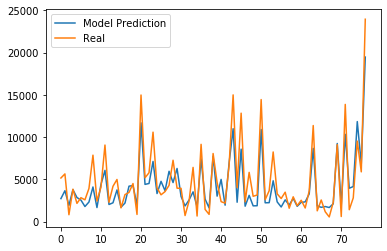

Prediction :  2711.616       real : 5152.0
Prediction :  3647.376       real : 5635.0
Prediction :  1909.536       real : 805.0
Prediction :  3767.688       real : 3829.0
Prediction :  2845.296       real : 2149.0
Prediction :  2537.8320000000003       real : 2821.0
Prediction :  1775.856       real : 2569.0
Prediction :  2310.576       real : 3913.0
Prediction :  4088.52       real : 7854.0
Prediction :  1655.544       real : 2422.0
Prediction :  4395.984       real : 4067.0
Prediction :  6053.616       real : 9051.0
Prediction :  2016.48       real : 2282.0
Prediction :  2217.0       real : 4172.0
Prediction :  3740.952       real : 4977.0
Prediction :  1695.648       real : 1617.0
Prediction :  2190.264       real : 3192.0
Prediction :  4182.096       real : 3437.0
Prediction :  4262.304       real : 4494.0
Prediction :  1896.168       real : 840.0
Prediction :  11681.544       real : 14973.0
Prediction :  4395.984       real : 5180.0
Prediction :  4502.928       real : 5775.0
Predi

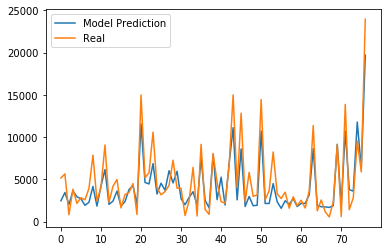

Prediction :  2457.624       real : 5152.0
Prediction :  3433.488       real : 5635.0
Prediction :  2016.48       real : 805.0
Prediction :  3620.64       real : 3829.0
Prediction :  2925.504       real : 2149.0
Prediction :  2698.248       real : 2821.0
Prediction :  1922.904       real : 2569.0
Prediction :  2270.4719999999998       real : 3913.0
Prediction :  4155.360000000001       real : 7854.0
Prediction :  1829.328       real : 2422.0
Prediction :  4182.096       real : 4067.0
Prediction :  6147.192       real : 9051.0
Prediction :  2029.848       real : 2282.0
Prediction :  2417.52       real : 4172.0
Prediction :  3607.272       real : 4977.0
Prediction :  1829.328       real : 1617.0
Prediction :  2364.048       real : 3192.0
Prediction :  3781.056       real : 3437.0
Prediction :  4248.936       real : 4494.0
Prediction :  2003.112       real : 840.0
Prediction :  11574.6       real : 14973.0
Prediction :  4623.24       real : 5180.0
Prediction :  4449.456       real : 5775.

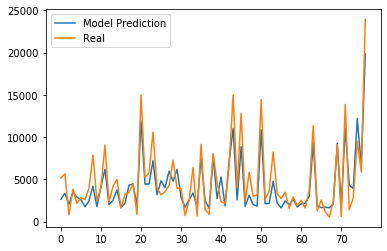

Prediction :  2631.408       real : 5152.0
Prediction :  3339.912       real : 5635.0
Prediction :  2056.584       real : 805.0
Prediction :  3406.752       real : 3829.0
Prediction :  2898.768       real : 2149.0
Prediction :  2591.304       real : 2821.0
Prediction :  1735.752       real : 2569.0
Prediction :  2457.624       real : 3913.0
Prediction :  4182.096       real : 7854.0
Prediction :  1762.488       real : 2422.0
Prediction :  4182.096       real : 4067.0
Prediction :  6173.928       real : 9051.0
Prediction :  2029.848       real : 2282.0
Prediction :  2484.3599999999997       real : 4172.0
Prediction :  3754.32       real : 4977.0
Prediction :  1628.808       real : 1617.0
Prediction :  2190.264       real : 3192.0
Prediction :  4302.407999999999       real : 3437.0
Prediction :  4449.456       real : 4494.0
Prediction :  1922.904       real : 840.0
Prediction :  11895.432       real : 14973.0
Prediction :  4422.719999999999       real : 5180.0
Prediction :  4449.456     

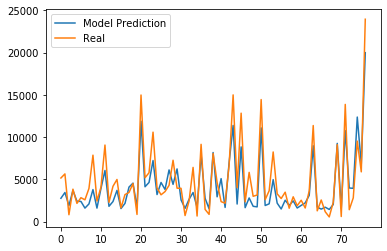

Prediction :  2751.72       real : 5152.0
Prediction :  3433.488       real : 5635.0
Prediction :  1882.8       real : 805.0
Prediction :  3674.112       real : 3829.0
Prediction :  2404.152       real : 2149.0
Prediction :  2377.416       real : 2821.0
Prediction :  1588.704       real : 2569.0
Prediction :  2083.3199999999997       real : 3913.0
Prediction :  3781.056       real : 7854.0
Prediction :  1588.704       real : 2422.0
Prediction :  3914.736       real : 4067.0
Prediction :  6040.248       real : 9051.0
Prediction :  1802.592       real : 2282.0
Prediction :  2364.048       real : 4172.0
Prediction :  3687.48       real : 4977.0
Prediction :  1535.232       real : 1617.0
Prediction :  2150.16       real : 3192.0
Prediction :  4075.152       real : 3437.0
Prediction :  4543.032       real : 4494.0
Prediction :  1668.912       real : 840.0
Prediction :  11868.696       real : 14973.0
Prediction :  4115.255999999999       real : 5180.0
Prediction :  4623.24       real : 5775.

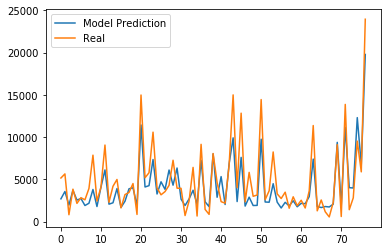

Prediction :  2684.88       real : 5152.0
Prediction :  3553.8       real : 5635.0
Prediction :  1949.64       real : 805.0
Prediction :  3687.48       real : 3829.0
Prediction :  2537.8320000000003       real : 2149.0
Prediction :  2724.984       real : 2821.0
Prediction :  1896.168       real : 2569.0
Prediction :  2163.5280000000002       real : 3913.0
Prediction :  3794.424       real : 7854.0
Prediction :  1775.856       real : 2422.0
Prediction :  4075.152       real : 4067.0
Prediction :  6107.088       real : 9051.0
Prediction :  2056.584       real : 2282.0
Prediction :  2217.0       real : 4172.0
Prediction :  3901.368       real : 4977.0
Prediction :  1668.912       real : 1617.0
Prediction :  2404.152       real : 3192.0
Prediction :  3874.632       real : 3437.0
Prediction :  3994.944       real : 4494.0
Prediction :  1856.064       real : 840.0
Prediction :  11427.552       real : 14973.0
Prediction :  4088.52       real : 5180.0
Prediction :  4248.936       real : 5775.0

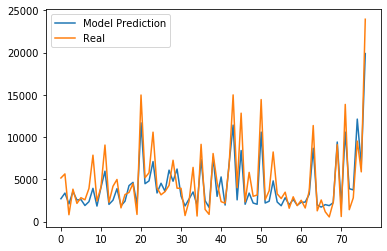

Prediction :  2698.248       real : 5152.0
Prediction :  3366.648       real : 5635.0
Prediction :  2083.3199999999997       real : 805.0
Prediction :  3553.8       real : 3829.0
Prediction :  2551.2       real : 2149.0
Prediction :  2604.672       real : 2821.0
Prediction :  1896.168       real : 2569.0
Prediction :  2350.6800000000003       real : 3913.0
Prediction :  3928.104       real : 7854.0
Prediction :  1829.328       real : 2422.0
Prediction :  4035.048       real : 4067.0
Prediction :  5960.04       real : 9051.0
Prediction :  2029.848       real : 2282.0
Prediction :  2524.464       real : 4172.0
Prediction :  3888.0       real : 4977.0
Prediction :  1856.064       real : 1617.0
Prediction :  2404.152       real : 3192.0
Prediction :  4248.936       real : 3437.0
Prediction :  4636.608       real : 4494.0
Prediction :  1976.376       real : 840.0
Prediction :  11681.544       real : 14973.0
Prediction :  4476.192       real : 5180.0
Prediction :  4810.392       real : 5775.

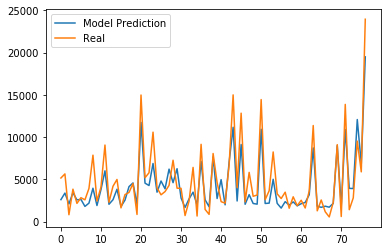

Prediction :  2591.304       real : 5152.0
Prediction :  3366.648       real : 5635.0
Prediction :  2083.3199999999997       real : 805.0
Prediction :  3406.752       real : 3829.0
Prediction :  2564.568       real : 2149.0
Prediction :  2618.04       real : 2821.0
Prediction :  1789.224       real : 2569.0
Prediction :  2176.8959999999997       real : 3913.0
Prediction :  3941.472       real : 7854.0
Prediction :  1896.168       real : 2422.0
Prediction :  3781.056       real : 4067.0
Prediction :  6000.144       real : 9051.0
Prediction :  2043.216       real : 2282.0
Prediction :  2577.9359999999997       real : 4172.0
Prediction :  3821.16       real : 4977.0
Prediction :  1775.856       real : 1617.0
Prediction :  2537.8320000000003       real : 3192.0
Prediction :  4128.624       real : 3437.0
Prediction :  4569.768       real : 4494.0
Prediction :  2003.112       real : 840.0
Prediction :  11735.016       real : 14973.0
Prediction :  4543.032       real : 5180.0
Prediction :  42

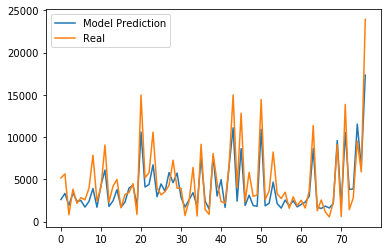

Prediction :  2604.672       real : 5152.0
Prediction :  3326.544       real : 5635.0
Prediction :  1909.536       real : 805.0
Prediction :  3380.016       real : 3829.0
Prediction :  2404.152       real : 2149.0
Prediction :  2470.992       real : 2821.0
Prediction :  1709.016       real : 2569.0
Prediction :  2377.416       real : 3913.0
Prediction :  3901.368       real : 7854.0
Prediction :  1695.648       real : 2422.0
Prediction :  4289.04       real : 4067.0
Prediction :  6093.72       real : 9051.0
Prediction :  1789.224       real : 2282.0
Prediction :  2430.888       real : 4172.0
Prediction :  3781.056       real : 4977.0
Prediction :  1695.648       real : 1617.0
Prediction :  2297.208       real : 3192.0
Prediction :  3954.84       real : 3437.0
Prediction :  4289.04       real : 4494.0
Prediction :  1829.328       real : 840.0
Prediction :  10585.368       real : 14973.0
Prediction :  4088.52       real : 5180.0
Prediction :  4382.616       real : 5775.0
Prediction :  67

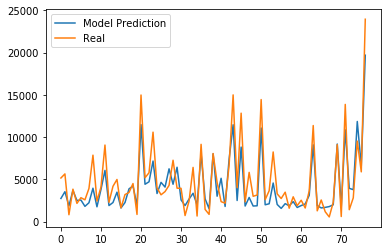

Prediction :  2729.4       real : 5152.0
Prediction :  3529.8       real : 5635.0
Prediction :  1848.96       real : 805.0
Prediction :  3676.54       real : 3829.0
Prediction :  2489.2799999999997       real : 2149.0
Prediction :  2542.6400000000003       real : 2821.0
Prediction :  1795.6       real : 2569.0
Prediction :  2222.48       real : 3913.0
Prediction :  3943.34       real : 7854.0
Prediction :  1742.24       real : 2422.0
Prediction :  3796.6       real : 4067.0
Prediction :  6051.06       real : 9051.0
Prediction :  1888.98       real : 2282.0
Prediction :  2249.16       real : 4172.0
Prediction :  3476.44       real : 4977.0
Prediction :  1608.8400000000001       real : 1617.0
Prediction :  2249.16       real : 3192.0
Prediction :  3863.3       real : 3437.0
Prediction :  4210.139999999999       real : 4494.0
Prediction :  1875.64       real : 840.0
Prediction :  11467.1       real : 14973.0
Prediction :  4410.24       real : 5180.0
Prediction :  4703.72       real : 5775

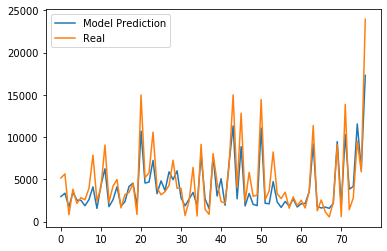

Prediction :  2952.24       real : 5152.0
Prediction :  3353.28       real : 5635.0
Prediction :  1709.016       real : 805.0
Prediction :  3460.224       real : 3829.0
Prediction :  2524.464       real : 2149.0
Prediction :  2511.096       real : 2821.0
Prediction :  1869.432       real : 2569.0
Prediction :  2591.304       real : 3913.0
Prediction :  4101.888       real : 7854.0
Prediction :  1548.6       real : 2422.0
Prediction :  4302.407999999999       real : 4067.0
Prediction :  6240.768       real : 9051.0
Prediction :  1762.488       real : 2282.0
Prediction :  2564.568       real : 4172.0
Prediction :  4115.255999999999       real : 4977.0
Prediction :  1802.592       real : 1617.0
Prediction :  2364.048       real : 3192.0
Prediction :  4155.360000000001       real : 3437.0
Prediction :  4543.032       real : 4494.0
Prediction :  1789.224       real : 840.0
Prediction :  10705.68       real : 14973.0
Prediction :  4556.4       real : 5180.0
Prediction :  4663.344       real 

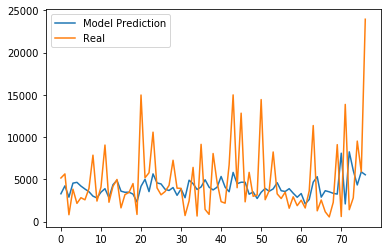

Prediction :  3286.44       real : 5152.0
Prediction :  4222.2       real : 5635.0
Prediction :  2885.4       real : 805.0
Prediction :  4543.032       real : 3829.0
Prediction :  4636.608       real : 2149.0
Prediction :  4195.464       real : 2821.0
Prediction :  3847.896       real : 2569.0
Prediction :  3527.064       real : 3913.0
Prediction :  3005.712       real : 7854.0
Prediction :  2791.824       real : 2422.0
Prediction :  3473.592       real : 4067.0
Prediction :  3888.0       real : 9051.0
Prediction :  2818.56       real : 2282.0
Prediction :  4355.88       real : 4172.0
Prediction :  4877.232       real : 4977.0
Prediction :  3593.904       real : 1617.0
Prediction :  3460.224       real : 3192.0
Prediction :  3473.592       real : 3437.0
Prediction :  3246.336       real : 4494.0
Prediction :  2310.576       real : 840.0
Prediction :  4168.728       real : 14973.0
Prediction :  4997.544       real : 5180.0
Prediction :  3540.432       real : 5775.0
Prediction :  5639.20

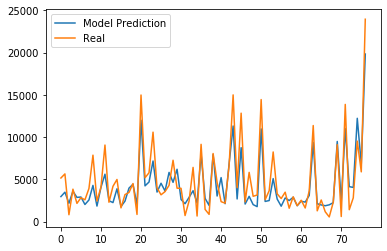

Prediction :  2952.24       real : 5152.0
Prediction :  3473.592       real : 5635.0
Prediction :  2163.5280000000002       real : 805.0
Prediction :  3580.536       real : 3829.0
Prediction :  2858.664       real : 2149.0
Prediction :  2898.768       real : 2821.0
Prediction :  2016.48       real : 2569.0
Prediction :  2551.2       real : 3913.0
Prediction :  4275.6720000000005       real : 7854.0
Prediction :  1829.328       real : 2422.0
Prediction :  4048.416       real : 4067.0
Prediction :  5599.104       real : 9051.0
Prediction :  2457.624       real : 2282.0
Prediction :  2243.736       real : 4172.0
Prediction :  3874.632       real : 4977.0
Prediction :  1775.856       real : 1617.0
Prediction :  2417.52       real : 3192.0
Prediction :  3954.84       real : 3437.0
Prediction :  4409.352       real : 4494.0
Prediction :  1949.64       real : 840.0
Prediction :  11989.008       real : 14973.0
Prediction :  4222.2       real : 5180.0
Prediction :  4676.712       real : 5775.0


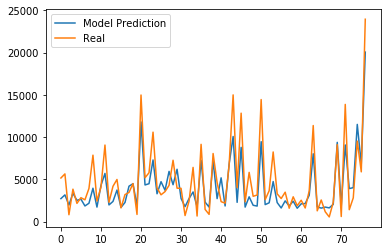

Prediction :  2711.616       real : 5152.0
Prediction :  3152.76       real : 5635.0
Prediction :  1949.64       real : 805.0
Prediction :  3339.912       real : 3829.0
Prediction :  2511.096       real : 2149.0
Prediction :  2644.776       real : 2821.0
Prediction :  1842.696       real : 2569.0
Prediction :  2163.5280000000002       real : 3913.0
Prediction :  3941.472       real : 7854.0
Prediction :  1709.016       real : 2422.0
Prediction :  4275.6720000000005       real : 4067.0
Prediction :  5692.68       real : 9051.0
Prediction :  1963.008       real : 2282.0
Prediction :  2377.416       real : 4172.0
Prediction :  3727.584       real : 4977.0
Prediction :  1668.912       real : 1617.0
Prediction :  2257.1040000000003       real : 3192.0
Prediction :  4182.096       real : 3437.0
Prediction :  4476.192       real : 4494.0
Prediction :  1815.96       real : 840.0
Prediction :  11788.488       real : 14973.0
Prediction :  4329.144       real : 5180.0
Prediction :  4476.192      

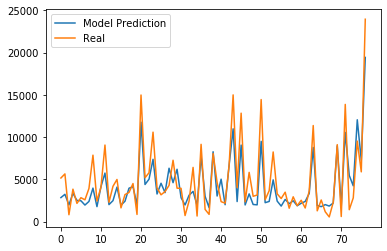

Prediction :  2831.928       real : 5152.0
Prediction :  3219.6       real : 5635.0
Prediction :  1963.008       real : 805.0
Prediction :  3339.912       real : 3829.0
Prediction :  2497.728       real : 2149.0
Prediction :  2457.624       real : 2821.0
Prediction :  1949.64       real : 2569.0
Prediction :  2377.416       real : 3913.0
Prediction :  3954.84       real : 7854.0
Prediction :  1762.488       real : 2422.0
Prediction :  4128.624       real : 4067.0
Prediction :  5732.784       real : 9051.0
Prediction :  2003.112       real : 2282.0
Prediction :  2470.992       real : 4172.0
Prediction :  4075.152       real : 4977.0
Prediction :  1936.272       real : 1617.0
Prediction :  2404.152       real : 3192.0
Prediction :  3941.472       real : 3437.0
Prediction :  4128.624       real : 4494.0
Prediction :  1949.64       real : 840.0
Prediction :  11761.752       real : 14973.0
Prediction :  4382.616       real : 5180.0
Prediction :  5010.912       real : 5775.0
Prediction :  73

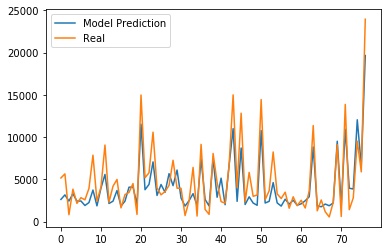

Prediction :  2618.04       real : 5152.0
Prediction :  3152.76       real : 5635.0
Prediction :  2417.52       real : 805.0
Prediction :  3299.808       real : 3829.0
Prediction :  2404.152       real : 2149.0
Prediction :  2430.888       real : 2821.0
Prediction :  1896.168       real : 2569.0
Prediction :  2243.736       real : 3913.0
Prediction :  3727.584       real : 7854.0
Prediction :  1856.064       real : 2422.0
Prediction :  3954.84       real : 4067.0
Prediction :  5572.368       real : 9051.0
Prediction :  2136.792       real : 2282.0
Prediction :  2404.152       real : 4172.0
Prediction :  3674.112       real : 4977.0
Prediction :  1829.328       real : 1617.0
Prediction :  2417.52       real : 3192.0
Prediction :  4061.784       real : 3437.0
Prediction :  4088.52       real : 4494.0
Prediction :  2016.48       real : 840.0
Prediction :  11521.128       real : 14973.0
Prediction :  3767.688       real : 5180.0
Prediction :  4395.984       real : 5775.0
Prediction :  7056

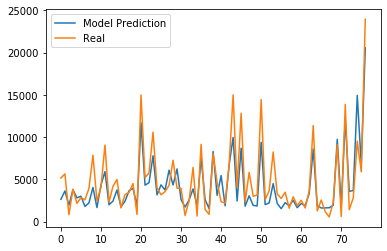

Prediction :  2631.408       real : 5152.0
Prediction :  3620.64       real : 5635.0
Prediction :  1936.272       real : 805.0
Prediction :  3754.32       real : 3829.0
Prediction :  2805.192       real : 2149.0
Prediction :  2992.344       real : 2821.0
Prediction :  1789.224       real : 2569.0
Prediction :  2203.632       real : 3913.0
Prediction :  4035.048       real : 7854.0
Prediction :  1655.544       real : 2422.0
Prediction :  4315.776       real : 4067.0
Prediction :  5906.568       real : 9051.0
Prediction :  1989.744       real : 2282.0
Prediction :  2417.52       real : 4172.0
Prediction :  3740.952       real : 4977.0
Prediction :  1735.752       real : 1617.0
Prediction :  2404.152       real : 3192.0
Prediction :  3634.008       real : 3437.0
Prediction :  3941.472       real : 4494.0
Prediction :  1856.064       real : 840.0
Prediction :  11694.912       real : 14973.0
Prediction :  4302.407999999999       real : 5180.0
Prediction :  4596.504       real : 5775.0
Predi

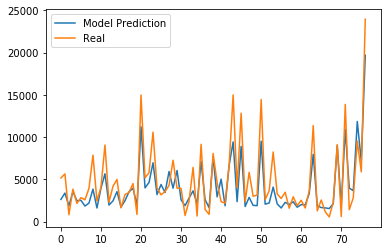

Prediction :  2618.04       real : 5152.0
Prediction :  3366.648       real : 5635.0
Prediction :  1856.064       real : 805.0
Prediction :  3540.432       real : 3829.0
Prediction :  2457.624       real : 2149.0
Prediction :  2511.096       real : 2821.0
Prediction :  1829.328       real : 2569.0
Prediction :  2176.8959999999997       real : 3913.0
Prediction :  3834.528       real : 7854.0
Prediction :  1602.072       real : 2422.0
Prediction :  3941.472       real : 4067.0
Prediction :  5652.576       real : 9051.0
Prediction :  1949.64       real : 2282.0
Prediction :  2444.2560000000003       real : 4172.0
Prediction :  3540.432       real : 4977.0
Prediction :  1709.016       real : 1617.0
Prediction :  2470.992       real : 3192.0
Prediction :  3513.696       real : 3437.0
Prediction :  3941.472       real : 4494.0
Prediction :  1922.904       real : 840.0
Prediction :  11213.664       real : 14973.0
Prediction :  3981.576       real : 5180.0
Prediction :  4623.24       real : 5

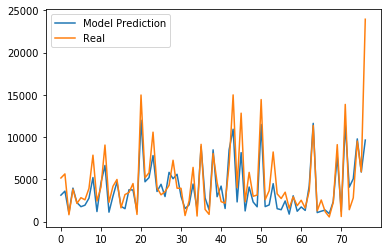

Prediction :  3120.624       real : 5152.0
Prediction :  3599.24       real : 5635.0
Prediction :  999.86       real : 805.0
Prediction :  3954.076       real : 3829.0
Prediction :  2237.66       real : 2149.0
Prediction :  1759.044       real : 2821.0
Prediction :  1932.336       real : 2569.0
Prediction :  2757.536       real : 3913.0
Prediction :  5208.38       real : 7854.0
Prediction :  1181.404       real : 2422.0
Prediction :  4597.732       real : 4067.0
Prediction :  6635.976       real : 9051.0
Prediction :  1107.136       real : 2282.0
Prediction :  3005.096       real : 4172.0
Prediction :  4688.504       real : 4977.0
Prediction :  1800.304       real : 1617.0
Prediction :  1519.7359999999999       real : 3192.0
Prediction :  3764.28       real : 3437.0
Prediction :  3731.272       real : 4494.0
Prediction :  1197.908       real : 840.0
Prediction :  11991.524       real : 14973.0
Prediction :  4705.008       real : 5180.0
Prediction :  5200.128       real : 5775.0
Predict

In [6]:
all_test_y = []
all_test_predication = []
avg_ame=0
for i in range(number_of_folds):
    print(" ")
    print("Fold ","#",i+1)
    start  = time.time()
    model = RegressionTsetlinMachine(3150, 1750, 3.5)
    
    train_data, test_data = trainTestSpliter(foldsIndex[i],scaled_data)
    train_x, train_y, test_x, test_y = dataTargetSpluter(train_data,test_data)
    
    b = Binarizer(max_bits_per_feature = 10)
    b.fit(train_x)
    X_transformed_train = b.transform(train_x)
    
    b = Binarizer(max_bits_per_feature = 10)
    b.fit(test_x)
    X_transformed_test = b.transform(test_x)
    
    model.fit(X_transformed_train, train_y, epochs=100)
    
    all_data_x =[]
    all_data_y = []

    for i in scaled_data:
        all_data_x.append(i[:9])
        all_data_y.append(i[9])

    all_data_x = np.array(all_data_x)
    all_data_y = np.array(all_data_y)
    
    b = Binarizer(max_bits_per_feature = 10)
    b.fit(all_data_x)
    X_transformed_all_data_x = b.transform(all_data_x)
    prediction = model.predict(X_transformed_all_data_x)
    end = time.time()

    plt.plot(prediction, label="Model Prediction")
    plt.plot(all_data_y, label="Real")
    plt.legend()
    plt.show()


    for i in range(len(prediction)):
        print("Prediction : ", prediction[i],"     ","real :", all_data_y[i])
    print("All-data-MAE: ",mean_absolute_error(all_data_y,prediction))
    
    prediction = model.predict(X_transformed_test)
    print("Test-MAE: ",mean_absolute_error(test_y,prediction))
    all_test_y.append(test_y)
    all_test_predication.append(prediction)
    avg_ame+=mean_absolute_error(test_y,prediction)
    print("Took: ",end-start, "Seconds")
    print("#################################################################################################")
print("\n \n avg test-MAE : ",avg_ame/number_of_folds)

In [7]:
import statistics 
maes=[]
pred_25 = []
pred_50 = []
for i in range(len(all_test_y)):
    #print((abs(all_test_y[i]-all_test_predication[i])/all_test_y[i]))
    maes.append((abs(all_test_y[i]-all_test_predication[i])/all_test_y[i]))
    if (abs(all_test_y[i]-all_test_predication[i])/all_test_y[i])<0.25:
        pred_25.append(abs(all_test_y[i]-all_test_predication[i])/all_test_y[i])
    if (abs(all_test_y[i]-all_test_predication[i])/all_test_y[i])<0.50:
        pred_50.append(abs(all_test_y[i]-all_test_predication[i])/all_test_y[i])
sum = 0
for i in maes:
    sum+=i
print("MMRE", sum/len(maes))
print("PRED 0.25: ", (((100/77)*len(pred_25)))/100)
print("PRED 0.50: ", (((100/77)*len(pred_50)))/100)
print("Median: ",statistics.median(maes))

MMRE [0.69763851]
PRED 0.25:  0.33766233766233766
PRED 0.50:  0.5324675324675324
Median:  [0.4300695]
